## Загрузим нужные библиотеки

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import json
import numpy as np

import os

import catboost as cb
from catboost import Pool, cv
from catboost.utils import eval_metric


%matplotlib inline

In [48]:
WORK_DIR = r'C:/WORK/Inno/'
SEED=42

In [49]:
tr_df = pd.read_csv(WORK_DIR+"/train.csv", index_col='id')
test_df = pd.read_csv(WORK_DIR+"/test.csv", index_col='id')
TR_TEST_LIM = len(tr_df)
print(len(tr_df), len(test_df))#, len(pd.unique(tr_df['id'])), len(pd.value_counts(test_df['id']))
tr_test_df = pd.concat([tr_df,test_df],axis=0)
CLASS_NBR = len(tr_df['crop'].unique())
tr_test_df

4830 2071


,area,nd_mean_2021-04-16,nd_mean_2021-04-19,nd_mean_2021-04-22,nd_mean_2021-04-26,nd_mean_2021-04-28,nd_mean_2021-05-02,nd_mean_2021-05-04,nd_mean_2021-05-07,nd_mean_2021-05-16,...,nd_mean_2021-05-20,nd_mean_2021-06-04,nd_mean_2021-06-05,nd_mean_2021-06-10,nd_mean_2021-07-05,nd_mean_2021-08-13,nd_mean_2021-08-27,nd_mean_2021-05-08,nd_mean_2021-05-24,crop
id,,,,,,,,,,,,,,,,,,,,,
3536,20,0.072846,0.261778,0.062981,0.104442,0.021096,0.052202,0.158723,0.000000,0.484102,...,0.108999,0.118854,0.000000,0.000000,0.026784,0.126832,0.614770,0.008857,0.081498,3.0
3739,45,0.332928,0.287182,0.097138,0.152467,0.075484,0.000000,0.140326,0.163340,0.519456,...,0.134469,0.208268,0.000000,0.000000,0.111148,0.174914,0.179612,0.113071,0.046997,4.0
1294,28,0.013679,0.007055,0.120804,0.037839,0.259125,0.000000,0.037446,0.506516,0.000000,...,0.084467,0.000000,0.210496,0.130467,0.155225,0.090607,0.054127,0.007437,0.219614,2.0
2859,19,0.105976,0.052500,0.001917,0.011531,0.042316,0.000000,0.000000,0.043604,0.510271,...,0.000000,0.642226,0.132886,0.000000,0.570928,0.073492,0.378900,0.327677,0.586523,5.0
3685,33,0.130885,0.063492,0.024416,0.000000,0.150671,0.046717,0.254284,0.101479,0.000000,...,0.206158,0.099058,0.152003,0.073357,0.147842,0.157676,0.012048,0.054223,0.017539,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1743,18,0.000000,0.017866,0.212560,0.231169,0.012535,0.000000,0.103303,0.014683,0.344103,...,0.070515,0.713042,0.018102,0.059161,0.804364,0.077803,0.112885,0.209859,0.269576,NaN
3968,56,0.010670,0.105135,0.170843,0.227927,0.000000,0.000000,0.000000,0.258106,0.575754,...,0.526469,0.173497,0.109647,0.744611,0.554205,0.572680,0.511447,0.101374,0.119901,NaN
3809,92,0.131978,0.058492,0.607262,0.389112,0.061173,0.185756,0.000000,0.545505,0.260217,...,0.031249,0.000000,0.000000,0.055619,0.051682,0.008488,0.076760,0.038590,0.086436,NaN


In [50]:
no_date_col = [col for col in tr_test_df.columns if col[:8]!='nd_mean_']
#date_col = sorted([col for col in tr_test_df.columns if not(col in no_date_col)])
date_col = [col for col in tr_test_df.columns if not(col in no_date_col)]
print(no_date_col, date_col)

['area', '.geo', 'crop'] ['nd_mean_2021-04-16', 'nd_mean_2021-04-19', 'nd_mean_2021-04-22', 'nd_mean_2021-04-26', 'nd_mean_2021-04-28', 'nd_mean_2021-05-02', 'nd_mean_2021-05-04', 'nd_mean_2021-05-07', 'nd_mean_2021-05-16', 'nd_mean_2021-05-17', 'nd_mean_2021-05-21', 'nd_mean_2021-05-26', 'nd_mean_2021-05-27', 'nd_mean_2021-05-29', 'nd_mean_2021-06-06', 'nd_mean_2021-06-09', 'nd_mean_2021-06-13', 'nd_mean_2021-06-16', 'nd_mean_2021-06-18', 'nd_mean_2021-06-19', 'nd_mean_2021-06-20', 'nd_mean_2021-06-22', 'nd_mean_2021-06-25', 'nd_mean_2021-06-27', 'nd_mean_2021-07-07', 'nd_mean_2021-07-08', 'nd_mean_2021-07-09', 'nd_mean_2021-07-13', 'nd_mean_2021-07-15', 'nd_mean_2021-07-17', 'nd_mean_2021-07-20', 'nd_mean_2021-07-26', 'nd_mean_2021-07-27', 'nd_mean_2021-07-29', 'nd_mean_2021-07-31', 'nd_mean_2021-08-07', 'nd_mean_2021-08-12', 'nd_mean_2021-04-15', 'nd_mean_2021-04-18', 'nd_mean_2021-04-25', 'nd_mean_2021-04-27', 'nd_mean_2021-04-29', 'nd_mean_2021-04-30', 'nd_mean_2021-06-07', 'nd_me

In [51]:
import datetime
day_list = [datetime.datetime.strptime(date[8:], '%Y-%m-%d') for date in date_col]
min_day=min(day_list)
day_list = [int((day-min_day).days) for day in day_list]
day_dict = {date_col[i]: day_list[i] for i in range(len(date_col))}
print(day_dict)
#tr_test_df.rename(columns=day_dict)


{'nd_mean_2021-04-16': 1, 'nd_mean_2021-04-19': 4, 'nd_mean_2021-04-22': 7, 'nd_mean_2021-04-26': 11, 'nd_mean_2021-04-28': 13, 'nd_mean_2021-05-02': 17, 'nd_mean_2021-05-04': 19, 'nd_mean_2021-05-07': 22, 'nd_mean_2021-05-16': 31, 'nd_mean_2021-05-17': 32, 'nd_mean_2021-05-21': 36, 'nd_mean_2021-05-26': 41, 'nd_mean_2021-05-27': 42, 'nd_mean_2021-05-29': 44, 'nd_mean_2021-06-06': 52, 'nd_mean_2021-06-09': 55, 'nd_mean_2021-06-13': 59, 'nd_mean_2021-06-16': 62, 'nd_mean_2021-06-18': 64, 'nd_mean_2021-06-19': 65, 'nd_mean_2021-06-20': 66, 'nd_mean_2021-06-22': 68, 'nd_mean_2021-06-25': 71, 'nd_mean_2021-06-27': 73, 'nd_mean_2021-07-07': 83, 'nd_mean_2021-07-08': 84, 'nd_mean_2021-07-09': 85, 'nd_mean_2021-07-13': 89, 'nd_mean_2021-07-15': 91, 'nd_mean_2021-07-17': 93, 'nd_mean_2021-07-20': 96, 'nd_mean_2021-07-26': 102, 'nd_mean_2021-07-27': 103, 'nd_mean_2021-07-29': 105, 'nd_mean_2021-07-31': 107, 'nd_mean_2021-08-07': 114, 'nd_mean_2021-08-12': 119, 'nd_mean_2021-04-15': 0, 'nd_mean_

In [52]:
tr_test_df[date_col].describe()
zeros_list=[]
zeros_list = [sum(tr_test_df[col]==0) for col in date_col]
print(zeros_list)
# для интерполяции сделать модель 
    #точнее 3 модели - для первого столбца, для середины и для конца
# посчитать равномерность интервалов
# посчитать макс число пропусков подряд
# посчитать макс число значений подряд
# посмотреть погодные данные (облачность, осадкт, солнечную активность)


[797, 1070, 739, 760, 998, 853, 1299, 1259, 173, 358, 1218, 504, 419, 768, 1026, 1088, 1286, 967, 103, 93, 55, 40, 147, 595, 44, 129, 51, 213, 678, 330, 583, 310, 559, 487, 737, 846, 301, 913, 860, 1151, 1241, 1127, 1076, 994, 1302, 1213, 578, 1036, 1214, 1356, 1010, 799, 1210, 1077, 1245, 1212, 1068, 1099, 1334, 1239, 1053, 1163, 1165, 1306, 1167, 1183, 1254, 1124, 1153, 1329]


Рассмотрим единственный не числовой столбец

In [53]:
tr_test_df.select_dtypes(include=['object'])

.geo
id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

Это столбец **.geo**

Тепепрь рассмотрим главный столбец с C/Х культурой

0    726
4    718
1    700
2    697
5    668
6    666
3    655
Name: crop, dtype: int64


<AxesSubplot:>

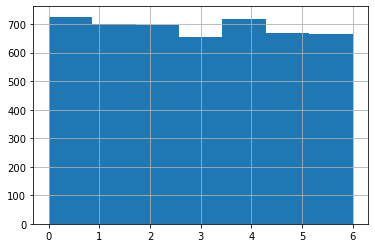

In [54]:
print(tr_df["crop"].value_counts())
tr_df["crop"].hist(bins = 7)
#Заметен слабый разброс популярности категориий

Посмотрим на разброс площади полей

<AxesSubplot:xlabel='area', ylabel='count'>

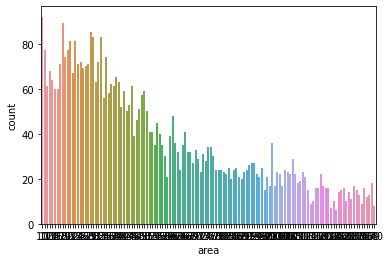

In [55]:
sns.countplot(x = "area" , data  = tr_df)  

Постараемся найти закономерность

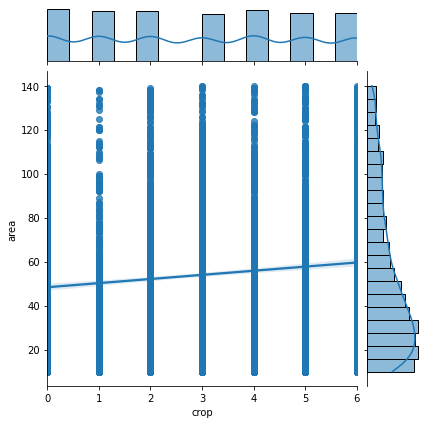

In [56]:
sns.jointplot(x = "crop", y = 'area', data = tr_df, kind = 'reg')

Кажется нет четкой зависимости между категорией культуры и площадью территроии

Последняя попытка найти явную зависимость в данных

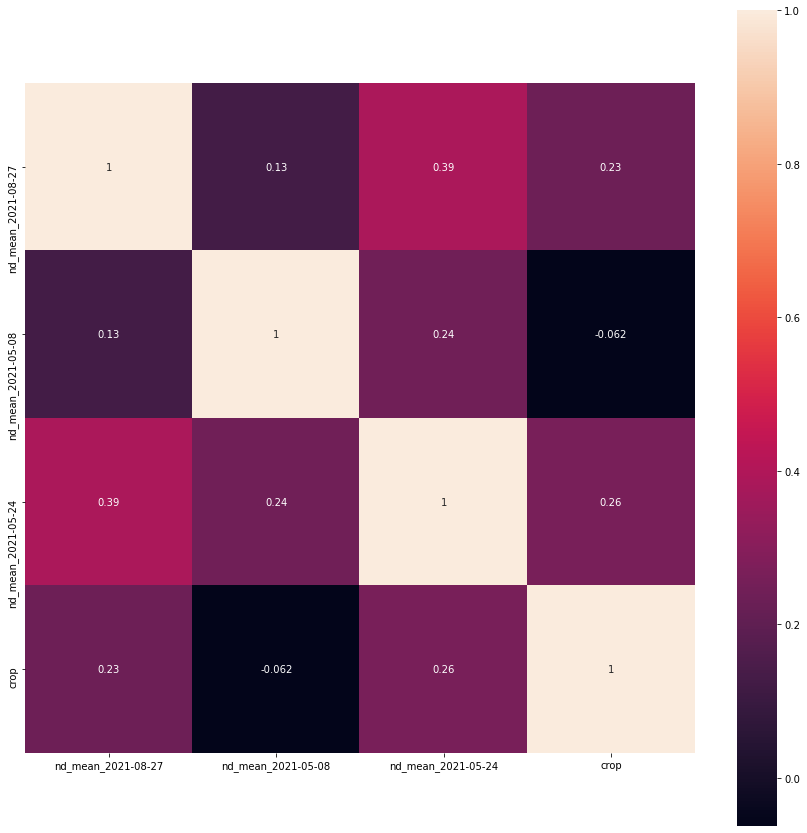

In [57]:
plt.rcParams['figure.figsize']=(15,15)

corr = tr_df.loc[:, "nd_mean_2021-08-27":"crop"].corr()
g = sns.heatmap(corr, square = True, annot=True)

In [58]:
#%%time
pd.set_option('display.max_colwidth', None)
#tr_test_df[no_date_col]
#tr_test_df['lt', 'att'] = tr_test_df['.geo'].apply(lambda x:)

tr_test_df['coordinates']=pd.json_normalize(tr_test_df['.geo'].apply(lambda x: json.loads(x)))['coordinates']
# их кажется надо бы грохнуть или найти похожие
terra_incognita = tr_test_df['coordinates'].apply(lambda x: type(x)==float)
print(sum(terra_incognita))#TODO их немного, пока обнулим/усредним, по ходу дела можно будет найти похожие

15


In [59]:
tr_test_df['coordinates'].fillna(0,inplace=True)
tr_test_df['coordinates'] = tr_test_df['coordinates'].apply(lambda x: [[[0,0]]] if x==0 else x)
tr_test_df[tr_test_df['coordinates']==0]

,area,nd_mean_2021-04-16,nd_mean_2021-04-19,nd_mean_2021-04-22,nd_mean_2021-04-26,nd_mean_2021-04-28,nd_mean_2021-05-02,nd_mean_2021-05-04,nd_mean_2021-05-07,nd_mean_2021-05-16,...,nd_mean_2021-06-04,nd_mean_2021-06-05,nd_mean_2021-06-10,nd_mean_2021-07-05,nd_mean_2021-08-13,nd_mean_2021-08-27,nd_mean_2021-05-08,nd_mean_2021-05-24,crop,coordinates
id,,,,,,,,,,,,,,,,,,,,,


In [60]:
def flatten(S):
    if S == []:
        return S
    if isinstance(S[0], list):
        return flatten(S[0]) + flatten(S[1:])
    return S[:1] + flatten(S[1:])

def area_center(x):
    x= flatten(x)
    #if x.shape==(2,):
    #if type(x)==list:
    #print(type(x),x)
    #print(x)
    #return np.squeeze(x, axis=0).mean(axis=0)
    return np.array(x[0::2]).mean(), np.array(x[1::2]).mean()

tr_test_df['coord_mean'] = tr_test_df['coordinates'].apply(lambda x: area_center(x))
#tr_test_df[['coord_mean']].explode('coord_mean')

#tr_test_df['att','lt'] = tr_test_df['coordinates'].values[:,0]
#tr_test_df['lt'] = tr_test_df['coordinates'].values[:,1]
tr_test_df['coord_mean']

id
3536    (52.30522376265947, 55.052727344280214)
3739     (55.67208678443803, 54.00797587570352)
1294    (40.938883892204636, 51.33265803334905)
2859    (41.279191569493506, 50.22962759408186)
3685    (52.59364206192212, 54.378376232525476)
                         ...                   
1743     (54.45423465925759, 57.80140335331365)
3968     (40.107406557880935, 51.3592456207085)
3809    (40.599155521392234, 51.46343993001848)
5485     (35.199628677301256, 53.0224335120409)
5899    (54.59074498274593, 53.557627037204874)
Name: coord_mean, Length: 6901, dtype: object

In [90]:
#чето я утомился распаковывать
tr_test_df['lt'] = tr_test_df['coord_mean'].apply(lambda x:x[0])
tr_test_df['att'] = tr_test_df['coord_mean'].apply(lambda x:x[1])

'''
for i in tr_test_df['crop'].unique():
    #print(i, tr_test_df[tr_test_df['crop']==i]['att'].mean())
    tr_test_df.loc[tr_test_df['crop']==i, 'att'] = tr_test_df[tr_test_df['crop']==i]['att'].mean()
tr_test_df.loc[tr_test_df['att']<25,'att'] = tr_test_df[tr_test_df['crop']==i]['att'].mean()    

tr_test_df['att']=tr_test_df['att'].apply(lambda x: )

#tr_test_df['att','lt'] - в неправильном порядке отображает???
#чето так скор упал tr_test_df[['att','lt']] = np.radians(tr_test_df[['att','lt']]) # и к нулю ближе и синусы брать проще
tr_test_df[['att_rad','lt_rad']] = np.radians(tr_test_df[['att','lt']]) # и к нулю ближе и синусы брать проще
tr_test_df[['att','lt']] #в тч нулевые значения
tr_test_df.columns
'''

"\nfor i in tr_test_df['crop'].unique():\n    #print(i, tr_test_df[tr_test_df['crop']==i]['att'].mean())\n    tr_test_df.loc[tr_test_df['crop']==i, 'att'] = tr_test_df[tr_test_df['crop']==i]['att'].mean()\ntr_test_df.loc[tr_test_df['att']<25,'att'] = tr_test_df[tr_test_df['crop']==i]['att'].mean()    \n\ntr_test_df['att']=tr_test_df['att'].apply(lambda x: )\n\n#tr_test_df['att','lt'] - в неправильном порядке отображает???\n#чето так скор упал tr_test_df[['att','lt']] = np.radians(tr_test_df[['att','lt']]) # и к нулю ближе и синусы брать проще\ntr_test_df[['att_rad','lt_rad']] = np.radians(tr_test_df[['att','lt']]) # и к нулю ближе и синусы брать проще\ntr_test_df[['att','lt']] #в тч нулевые значения\ntr_test_df.columns\n"

In [95]:

for i in tr_test_df['crop'].unique():
    crop_att_mean = tr_test_df[tr_test_df['crop']==i]['att'].mean()
    tr_test_df.loc[(tr_test_df['crop']==i) & (tr_test_df['att']<25), 'att'] = crop_att_mean

#tr_test_df['att'].fillna(tr_test_df['att'].mean(),inplace=True)

tr_test_df.loc[tr_test_df['att']<25, 'att'] = tr_test_df['att'].mean()
tr_test_df.loc[tr_test_df['att']<25, 'att']

Series([], Name: att, dtype: float64)

In [100]:
#tr_test_df['att','lt'] - в неправильном порядке отображает???
#чето так скор упал tr_test_df[['att','lt']] = np.radians(tr_test_df[['att','lt']]) # и к нулю ближе и синусы брать проще
tr_test_df[['att_rad','lt_rad']] = np.radians(tr_test_df[['att','lt']]) # и к нулю ближе и синусы брать проще
tr_test_df.columns

Index(['area', 'nd_mean_2021-04-16', 'nd_mean_2021-04-19',
       'nd_mean_2021-04-22', 'nd_mean_2021-04-26', 'nd_mean_2021-04-28',
       'nd_mean_2021-05-02', 'nd_mean_2021-05-04', 'nd_mean_2021-05-07',
       'nd_mean_2021-05-16', 'nd_mean_2021-05-17', 'nd_mean_2021-05-21',
       'nd_mean_2021-05-26', 'nd_mean_2021-05-27', 'nd_mean_2021-05-29',
       'nd_mean_2021-06-06', 'nd_mean_2021-06-09', 'nd_mean_2021-06-13',
       'nd_mean_2021-06-16', 'nd_mean_2021-06-18', 'nd_mean_2021-06-19',
       'nd_mean_2021-06-20', 'nd_mean_2021-06-22', 'nd_mean_2021-06-25',
       'nd_mean_2021-06-27', 'nd_mean_2021-07-07', 'nd_mean_2021-07-08',
       'nd_mean_2021-07-09', 'nd_mean_2021-07-13', 'nd_mean_2021-07-15',
       'nd_mean_2021-07-17', 'nd_mean_2021-07-20', 'nd_mean_2021-07-26',
       'nd_mean_2021-07-27', 'nd_mean_2021-07-29', 'nd_mean_2021-07-31',
       'nd_mean_2021-08-07', 'nd_mean_2021-08-12', '.geo',
       'nd_mean_2021-04-15', 'nd_mean_2021-04-18', 'nd_mean_2021-04-25',
      

In [101]:

'''
def cbClassifier(iterations=None, cat_features=cat_features, text_features=text_features):
    tree_params = {
            'iterations': iterations,#None,
            'max_depth': 5,
            eval_metric='MultiClass',#'eval_metric': 'Recall',
            'loss_function': 'MultiClass', #'loss_function': 'Logloss',
            #'loss_function': 'MultiCrossEntropy',
            'early_stopping_rounds': 100,
            'random_state': SEED,
            #'l2_leaf_reg': 1,
            #'class_names': mass_label,
             
            'text_features': text_features,
            'cat_features': cat_features
            #diffusion_temperature=None,
            #text_processing=None
        }
    if len(tf.config.list_physical_devices('GPU'))>0:
        tree_params['task_type']='GPU' # если имеется GPU с CUDA, то можно ее задействовать, чтобы на порядок ускорить обучение
    return  cb.CatBoostClassifier(**tree_params)   
'''

### tr_test_df.drop(columns=['.geo', 'coordinates','coord_mean'],inplace=True)

#no_date_col = [col for col in tr_test_df.columns if col[:8]!='nd_mean_']
#date_col = [col for col in tr_test_df.columns if not(col in no_date_col)]
#print(no_date_col, date_col[:3], tr_test_df.columns)
no_date_col = ['area', 'att', 'lt', 'att_rad', 'lt_rad']
target_col = ['crop']
#date_col = [col for col in tr_test_df.columns if not(col in no_date_col+target_col)]
date_col = sorted(date_col) #старый порядок в словаре day_dict, если что, только что
#tr_test_df.rename(columns=day_dict)
tr_test_df = tr_test_df[target_col+no_date_col+date_col]
tr_df, test_df = tr_test_df[:TR_TEST_LIM], tr_test_df[TR_TEST_LIM:]
tr_df

,crop,area,att,lt,att_rad,lt_rad,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-19,...,nd_mean_2021-07-29,nd_mean_2021-07-31,nd_mean_2021-08-01,nd_mean_2021-08-07,nd_mean_2021-08-10,nd_mean_2021-08-11,nd_mean_2021-08-12,nd_mean_2021-08-13,nd_mean_2021-08-23,nd_mean_2021-08-27
id,,,,,,,,,,,,,,,,,,,,,
3536,3.0,20,55.052727,52.305224,0.960851,0.912898,0.187150,0.072846,0.262300,0.261778,...,0.727516,0.000000,0.754859,0.000000,0.030883,0.000000,0.658016,0.126832,0.034858,0.614770
3739,4.0,45,54.007976,55.672087,0.942617,0.971661,0.245285,0.332928,0.349133,0.287182,...,0.666918,0.089721,0.706226,0.184231,0.062582,0.618475,0.601685,0.174914,0.000000,0.179612
1294,2.0,28,51.332658,40.938884,0.895924,0.714518,0.006391,0.013679,0.000000,0.007055,...,0.321827,0.411168,0.000000,0.357296,0.045370,0.172080,0.000000,0.090607,0.000000,0.054127
2859,5.0,19,50.229628,41.279192,0.876672,0.720458,0.293425,0.105976,0.318047,0.052500,...,0.000000,0.055983,0.152193,0.060656,0.352723,0.379196,0.327025,0.073492,0.061776,0.378900
3685,4.0,33,54.378376,52.593642,0.949082,0.917932,0.027983,0.130885,0.117227,0.063492,...,0.833694,0.611108,0.772962,0.000000,0.080592,0.000000,0.055220,0.157676,0.022251,0.012048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,6.0,74,51.912312,39.159245,0.906041,0.683458,0.066154,0.028770,0.000000,0.038282,...,0.683847,0.379482,0.700605,0.645532,0.000000,0.059090,0.631144,0.042483,0.118901,0.022464
5191,6.0,109,52.157998,38.147746,0.910329,0.665804,0.243867,0.035939,0.013403,0.030722,...,0.792938,0.800815,0.634428,0.783913,0.093728,0.000000,0.776900,0.055721,0.057945,0.044182
5226,6.0,58,53.110860,32.873572,0.926959,0.573752,0.090026,0.191255,0.019897,0.063581,...,0.627561,0.740523,0.781434,0.783490,0.006700,0.132444,0.000000,0.007225,0.669367,0.145505


In [98]:
'''
for i in tr_test_df['crop'].unique():
    #print(i, tr_test_df[tr_test_df['crop']==i]['att'].mean())
    display(tr_test_df.loc[tr_test_df['crop']==i]['att'].describe())
'''
tr_test_df[['att']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6901 entries, 3536 to 5899
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   att     6901 non-null   float64
dtypes: float64(1)
memory usage: 107.8 KB


In [17]:
#(X_train, y_train, X_val, y_val, X_test, y_test ) 

#D_train = catboost.Pool(X_train, y_train)
#D_val = catboost.Pool(X_val, y_val)

params = dict()
params['iterations'] = 5000
params['loss_function'] = 'MultiClass'
params['use_best_model'] = True
params['eval_metric'] = 'MultiClass'
#params['eval_metric'] = 'Recall'
params['od_pval'] = 1e-3
params['random_seed'] = SEED
params['verbose'] = True
params['early_stopping_rounds'] = 100

#params['learning_rate'] = 0.10
#params['depth'] = 6
#params['l2_leaf_reg'] = 4
#params['rsm'] = 1.0
#params['max_depth'] = 5

'''
'iterations': iterations,#None,

#'l2_leaf_reg': 1,
#'class_names': mass_label,

'text_features': text_features,
'cat_features': cat_features
'''
cv_data = Pool(data=tr_df[no_date_col+date_col],
                  label=tr_df[target_col],
                  #cat_features=[0]
                 )

n_split = 5
'''
model = catboost.CatBoostClassifier(iterations=params['iterations'],
                                    #learning_rate=params['learning_rate'],
                                    #depth=int(params['depth']),
                                    loss_function='MultiClass',
                                    use_best_model=True,
                                    eval_metric='MultiClass',
                                    #l2_leaf_reg=params['l2_leaf_reg'],
                                    auto_stop_pval=1e-3,
                                    random_seed=SEED,
                                    verbose=True,
                                    #'early_stopping_rounds': 100,
                                    #'max_depth': 5,
                                    )

'''

'''
#cv = StratifiedKFold(n_splits=n_splits, random_state=SEED, shuffle=True)
#model_dict, res_dict = dict(), dict()
for target_col in lab_list:
    print('******************',target_col,'******************')
    model_dict[target_col] = []
    oof = np.zeros(len(df_tr_val))        
    for fold_, (train_idx, val_idx) in enumerate(cv.split(df_tr_val), 1):#, targets
        print(f'Training with fold {fold_} started.')
        mod, res = fit_eval(model(), train_idx, val_idx, [target_col])
        #print(mod.best_score_)
        model_dict[target_col].append(mod)
        oof[val_idx] = res[:, 1]
    res_dict[target_col]=oof
    print('res_dict', len(res_dict[target_col]), oof.shape)

model.fit(D_train, eval_set=D_val, verbose=True)

print('nb_trees={}'.format(model.get_tree_count()))

y_pred = model.predict_proba(X_test)
test_loss = sklearn.metrics.log_loss( y_test, y_pred, labels=list(range(10)))
acc = sklearn.metrics.accuracy_score( y_test, numpy.argmax( y_pred, axis=1 ) )
print('test_loss={} test_acc={}'.format(test_loss, acc))
'''


cv_data = cv(
    params = params,
    pool = cv_data,
    fold_count=n_split,
    shuffle=True,#???
    partition_random_seed=SEED,
    plot=True,
    stratified=True,
    verbose=True,
    return_models = True
)

# попробовать выбросить поля у которых координат нет
# или заменить на медиану???

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]
0:	learn: 1.8661047	test: 1.8684782	best: 1.8684782 (0)	total: 227ms	remaining: 18m 55s
1:	learn: 1.7984448	test: 1.8047262	best: 1.8047262 (1)	total: 284ms	remaining: 11m 49s
2:	learn: 1.7372909	test: 1.7445320	best: 1.7445320 (2)	total: 336ms	remaining: 9m 18s
3:	learn: 1.6805498	test: 1.6914418	best: 1.6914418 (3)	total: 392ms	remaining: 8m 9s
4:	learn: 1.6280155	test: 1.6422456	best: 1.6422456 (4)	total: 446ms	remaining: 7m 25s
5:	learn: 1.5808459	test: 1.5972912	best: 1.5972912 (5)	total: 499ms	remaining: 6m 55s
6:	learn: 1.5417193	test: 1.5576919	best: 1.5576919 (6)	total: 545ms	remaining: 6m 29s
7:	learn: 1.4962773	test: 1.5122140	best: 1.5122140 (7)	total: 592ms	remaining: 6m 9s
8:	learn: 1.4537221	test: 1.4713543	best: 1.4713543 (8)	total: 638ms	remaining: 5m 53s
9:	learn: 1.4189839	test: 1.4383175	best: 1.4383175 (9)	total: 697ms	remaining: 5m 47s
10:	learn: 1.3826770	test: 1.4036996	best: 1.4036996 (10)	total: 744ms	remaining: 5m 37s
11:	learn: 1.34849

97:	learn: 0.4157413	test: 0.4506956	best: 0.4506956 (97)	total: 5.14s	remaining: 4m 17s
98:	learn: 0.4122866	test: 0.4470083	best: 0.4470083 (98)	total: 5.18s	remaining: 4m 16s
99:	learn: 0.4090465	test: 0.4439866	best: 0.4439866 (99)	total: 5.23s	remaining: 4m 16s
100:	learn: 0.4066208	test: 0.4419076	best: 0.4419076 (100)	total: 5.28s	remaining: 4m 15s
101:	learn: 0.4034138	test: 0.4388309	best: 0.4388309 (101)	total: 5.33s	remaining: 4m 15s
102:	learn: 0.3997975	test: 0.4354957	best: 0.4354957 (102)	total: 5.38s	remaining: 4m 15s
103:	learn: 0.3967489	test: 0.4324022	best: 0.4324022 (103)	total: 5.43s	remaining: 4m 15s
104:	learn: 0.3934768	test: 0.4292281	best: 0.4292281 (104)	total: 5.48s	remaining: 4m 15s
105:	learn: 0.3906639	test: 0.4265610	best: 0.4265610 (105)	total: 5.53s	remaining: 4m 15s
106:	learn: 0.3881972	test: 0.4242491	best: 0.4242491 (106)	total: 5.58s	remaining: 4m 15s
107:	learn: 0.3851601	test: 0.4211937	best: 0.4211937 (107)	total: 5.63s	remaining: 4m 14s
108:	

190:	learn: 0.2443684	test: 0.2881027	best: 0.2881027 (190)	total: 9.72s	remaining: 4m 4s
191:	learn: 0.2435349	test: 0.2873720	best: 0.2873720 (191)	total: 9.77s	remaining: 4m 4s
192:	learn: 0.2424972	test: 0.2862899	best: 0.2862899 (192)	total: 9.81s	remaining: 4m 4s
193:	learn: 0.2413839	test: 0.2853403	best: 0.2853403 (193)	total: 9.86s	remaining: 4m 4s
194:	learn: 0.2404425	test: 0.2845076	best: 0.2845076 (194)	total: 9.91s	remaining: 4m 4s
195:	learn: 0.2393480	test: 0.2837264	best: 0.2837264 (195)	total: 9.96s	remaining: 4m 4s
196:	learn: 0.2385625	test: 0.2830205	best: 0.2830205 (196)	total: 10s	remaining: 4m 4s
197:	learn: 0.2373574	test: 0.2819278	best: 0.2819278 (197)	total: 10.1s	remaining: 4m 4s
198:	learn: 0.2362525	test: 0.2807916	best: 0.2807916 (198)	total: 10.1s	remaining: 4m 3s
199:	learn: 0.2353158	test: 0.2801845	best: 0.2801845 (199)	total: 10.2s	remaining: 4m 3s
200:	learn: 0.2342704	test: 0.2791782	best: 0.2791782 (200)	total: 10.2s	remaining: 4m 3s
201:	learn: 

283:	learn: 0.1786968	test: 0.2297390	best: 0.2297390 (283)	total: 14.2s	remaining: 3m 56s
284:	learn: 0.1783463	test: 0.2295580	best: 0.2295580 (284)	total: 14.3s	remaining: 3m 56s
285:	learn: 0.1777381	test: 0.2289727	best: 0.2289727 (285)	total: 14.3s	remaining: 3m 56s
286:	learn: 0.1772296	test: 0.2284134	best: 0.2284134 (286)	total: 14.4s	remaining: 3m 56s
287:	learn: 0.1766835	test: 0.2279804	best: 0.2279804 (287)	total: 14.4s	remaining: 3m 55s
288:	learn: 0.1763717	test: 0.2277777	best: 0.2277777 (288)	total: 14.5s	remaining: 3m 55s
289:	learn: 0.1758819	test: 0.2272360	best: 0.2272360 (289)	total: 14.5s	remaining: 3m 55s
290:	learn: 0.1753675	test: 0.2269029	best: 0.2269029 (290)	total: 14.6s	remaining: 3m 55s
291:	learn: 0.1749825	test: 0.2265986	best: 0.2265986 (291)	total: 14.6s	remaining: 3m 55s
292:	learn: 0.1745070	test: 0.2261956	best: 0.2261956 (292)	total: 14.7s	remaining: 3m 55s
293:	learn: 0.1740378	test: 0.2258142	best: 0.2258142 (293)	total: 14.7s	remaining: 3m 55s

374:	learn: 0.1437666	test: 0.2009407	best: 0.2009407 (374)	total: 18.7s	remaining: 3m 50s
375:	learn: 0.1434183	test: 0.2005835	best: 0.2005835 (375)	total: 18.7s	remaining: 3m 50s
376:	learn: 0.1431612	test: 0.2003124	best: 0.2003124 (376)	total: 18.8s	remaining: 3m 50s
377:	learn: 0.1430274	test: 0.2002383	best: 0.2002383 (377)	total: 18.8s	remaining: 3m 50s
378:	learn: 0.1425612	test: 0.1998702	best: 0.1998702 (378)	total: 18.9s	remaining: 3m 50s
379:	learn: 0.1423185	test: 0.1996531	best: 0.1996531 (379)	total: 18.9s	remaining: 3m 50s
380:	learn: 0.1421659	test: 0.1995100	best: 0.1995100 (380)	total: 19s	remaining: 3m 50s
381:	learn: 0.1418412	test: 0.1992125	best: 0.1992125 (381)	total: 19s	remaining: 3m 50s
382:	learn: 0.1415776	test: 0.1990033	best: 0.1990033 (382)	total: 19.1s	remaining: 3m 49s
383:	learn: 0.1412171	test: 0.1986143	best: 0.1986143 (383)	total: 19.1s	remaining: 3m 49s
384:	learn: 0.1410057	test: 0.1985338	best: 0.1985338 (384)	total: 19.2s	remaining: 3m 49s
385

468:	learn: 0.1216806	test: 0.1849943	best: 0.1849943 (468)	total: 23.3s	remaining: 3m 44s
469:	learn: 0.1214931	test: 0.1848482	best: 0.1848482 (469)	total: 23.3s	remaining: 3m 44s
470:	learn: 0.1212544	test: 0.1847871	best: 0.1847871 (470)	total: 23.4s	remaining: 3m 44s
471:	learn: 0.1209549	test: 0.1843688	best: 0.1843688 (471)	total: 23.4s	remaining: 3m 44s
472:	learn: 0.1207768	test: 0.1843122	best: 0.1843122 (472)	total: 23.5s	remaining: 3m 44s
473:	learn: 0.1205286	test: 0.1842272	best: 0.1842272 (473)	total: 23.5s	remaining: 3m 44s
474:	learn: 0.1202993	test: 0.1840481	best: 0.1840481 (474)	total: 23.6s	remaining: 3m 44s
475:	learn: 0.1201473	test: 0.1839284	best: 0.1839284 (475)	total: 23.6s	remaining: 3m 44s
476:	learn: 0.1197600	test: 0.1836274	best: 0.1836274 (476)	total: 23.7s	remaining: 3m 44s
477:	learn: 0.1195417	test: 0.1834376	best: 0.1834376 (477)	total: 23.7s	remaining: 3m 44s
478:	learn: 0.1192337	test: 0.1833431	best: 0.1833431 (478)	total: 23.7s	remaining: 3m 44s

560:	learn: 0.1058927	test: 0.1732921	best: 0.1732921 (560)	total: 28s	remaining: 3m 41s
561:	learn: 0.1057922	test: 0.1732569	best: 0.1732569 (561)	total: 28s	remaining: 3m 41s
562:	learn: 0.1055890	test: 0.1730945	best: 0.1730945 (562)	total: 28.1s	remaining: 3m 41s
563:	learn: 0.1054459	test: 0.1729303	best: 0.1729303 (563)	total: 28.1s	remaining: 3m 41s
564:	learn: 0.1053888	test: 0.1729064	best: 0.1729064 (564)	total: 28.2s	remaining: 3m 41s
565:	learn: 0.1051406	test: 0.1728126	best: 0.1728126 (565)	total: 28.3s	remaining: 3m 41s
566:	learn: 0.1050257	test: 0.1727141	best: 0.1727141 (566)	total: 28.3s	remaining: 3m 41s
567:	learn: 0.1048298	test: 0.1724788	best: 0.1724788 (567)	total: 28.4s	remaining: 3m 41s
568:	learn: 0.1046886	test: 0.1723418	best: 0.1723418 (568)	total: 28.4s	remaining: 3m 41s
569:	learn: 0.1045739	test: 0.1722486	best: 0.1722486 (569)	total: 28.5s	remaining: 3m 41s
570:	learn: 0.1044226	test: 0.1721820	best: 0.1721820 (570)	total: 28.5s	remaining: 3m 41s
571

651:	learn: 0.0943273	test: 0.1657919	best: 0.1657919 (651)	total: 32.8s	remaining: 3m 38s
652:	learn: 0.0942072	test: 0.1657385	best: 0.1657385 (652)	total: 32.8s	remaining: 3m 38s
653:	learn: 0.0940270	test: 0.1656069	best: 0.1656069 (653)	total: 32.9s	remaining: 3m 38s
654:	learn: 0.0939236	test: 0.1655557	best: 0.1655557 (654)	total: 32.9s	remaining: 3m 38s
655:	learn: 0.0937635	test: 0.1654057	best: 0.1654057 (655)	total: 33s	remaining: 3m 38s
656:	learn: 0.0936736	test: 0.1653787	best: 0.1653787 (656)	total: 33s	remaining: 3m 38s
657:	learn: 0.0936092	test: 0.1653438	best: 0.1653438 (657)	total: 33.1s	remaining: 3m 38s
658:	learn: 0.0934128	test: 0.1650938	best: 0.1650938 (658)	total: 33.1s	remaining: 3m 38s
659:	learn: 0.0932107	test: 0.1649144	best: 0.1649144 (659)	total: 33.2s	remaining: 3m 38s
660:	learn: 0.0931238	test: 0.1648714	best: 0.1648714 (660)	total: 33.2s	remaining: 3m 38s
661:	learn: 0.0930067	test: 0.1647460	best: 0.1647460 (661)	total: 33.3s	remaining: 3m 37s
662

742:	learn: 0.0845398	test: 0.1596107	best: 0.1596107 (742)	total: 37.3s	remaining: 3m 33s
743:	learn: 0.0844171	test: 0.1595065	best: 0.1595065 (743)	total: 37.3s	remaining: 3m 33s
744:	learn: 0.0843484	test: 0.1594459	best: 0.1594459 (744)	total: 37.4s	remaining: 3m 33s
745:	learn: 0.0842168	test: 0.1593421	best: 0.1593421 (745)	total: 37.4s	remaining: 3m 33s
746:	learn: 0.0841070	test: 0.1592636	best: 0.1592636 (746)	total: 37.5s	remaining: 3m 33s
747:	learn: 0.0840336	test: 0.1592209	best: 0.1592209 (747)	total: 37.5s	remaining: 3m 33s
748:	learn: 0.0839266	test: 0.1591649	best: 0.1591649 (748)	total: 37.6s	remaining: 3m 33s
749:	learn: 0.0838601	test: 0.1591531	best: 0.1591531 (749)	total: 37.6s	remaining: 3m 33s
750:	learn: 0.0837604	test: 0.1591517	best: 0.1591517 (750)	total: 37.7s	remaining: 3m 33s
751:	learn: 0.0836837	test: 0.1591251	best: 0.1591251 (751)	total: 37.7s	remaining: 3m 33s
752:	learn: 0.0836109	test: 0.1590746	best: 0.1590746 (752)	total: 37.8s	remaining: 3m 33s

834:	learn: 0.0762172	test: 0.1548479	best: 0.1548301 (833)	total: 41.8s	remaining: 3m 28s
835:	learn: 0.0761273	test: 0.1548033	best: 0.1548033 (835)	total: 41.9s	remaining: 3m 28s
836:	learn: 0.0760727	test: 0.1547597	best: 0.1547597 (836)	total: 41.9s	remaining: 3m 28s
837:	learn: 0.0760174	test: 0.1547074	best: 0.1547074 (837)	total: 42s	remaining: 3m 28s
838:	learn: 0.0759920	test: 0.1546900	best: 0.1546900 (838)	total: 42.1s	remaining: 3m 28s
839:	learn: 0.0759312	test: 0.1546452	best: 0.1546452 (839)	total: 42.1s	remaining: 3m 28s
840:	learn: 0.0758621	test: 0.1545783	best: 0.1545783 (840)	total: 42.2s	remaining: 3m 28s
841:	learn: 0.0757288	test: 0.1543437	best: 0.1543437 (841)	total: 42.2s	remaining: 3m 28s
842:	learn: 0.0756091	test: 0.1542736	best: 0.1542736 (842)	total: 42.2s	remaining: 3m 28s
843:	learn: 0.0755217	test: 0.1542294	best: 0.1542294 (843)	total: 42.3s	remaining: 3m 28s
844:	learn: 0.0754144	test: 0.1541803	best: 0.1541803 (844)	total: 42.3s	remaining: 3m 28s
8

926:	learn: 0.0694515	test: 0.1505765	best: 0.1505765 (926)	total: 47.4s	remaining: 3m 28s
927:	learn: 0.0693832	test: 0.1505687	best: 0.1505687 (927)	total: 47.4s	remaining: 3m 28s
928:	learn: 0.0693124	test: 0.1505992	best: 0.1505687 (927)	total: 47.5s	remaining: 3m 28s
929:	learn: 0.0692703	test: 0.1505840	best: 0.1505687 (927)	total: 47.5s	remaining: 3m 28s
930:	learn: 0.0692252	test: 0.1505265	best: 0.1505265 (930)	total: 47.6s	remaining: 3m 28s
931:	learn: 0.0690968	test: 0.1503869	best: 0.1503869 (931)	total: 47.7s	remaining: 3m 28s
932:	learn: 0.0690171	test: 0.1502907	best: 0.1502907 (932)	total: 47.7s	remaining: 3m 28s
933:	learn: 0.0689928	test: 0.1502260	best: 0.1502260 (933)	total: 47.8s	remaining: 3m 27s
934:	learn: 0.0689273	test: 0.1501770	best: 0.1501770 (934)	total: 47.8s	remaining: 3m 27s
935:	learn: 0.0688486	test: 0.1501132	best: 0.1501132 (935)	total: 47.9s	remaining: 3m 27s
936:	learn: 0.0687731	test: 0.1500200	best: 0.1500200 (936)	total: 47.9s	remaining: 3m 27s

1019:	learn: 0.0636109	test: 0.1466995	best: 0.1466995 (1019)	total: 52.2s	remaining: 3m 23s
1020:	learn: 0.0634820	test: 0.1465647	best: 0.1465647 (1020)	total: 52.3s	remaining: 3m 23s
1021:	learn: 0.0633709	test: 0.1465462	best: 0.1465462 (1021)	total: 52.3s	remaining: 3m 23s
1022:	learn: 0.0633196	test: 0.1464744	best: 0.1464744 (1022)	total: 52.4s	remaining: 3m 23s
1023:	learn: 0.0632763	test: 0.1464737	best: 0.1464737 (1023)	total: 52.4s	remaining: 3m 23s
1024:	learn: 0.0631906	test: 0.1464242	best: 0.1464242 (1024)	total: 52.5s	remaining: 3m 23s
1025:	learn: 0.0631258	test: 0.1463997	best: 0.1463997 (1025)	total: 52.5s	remaining: 3m 23s
1026:	learn: 0.0630538	test: 0.1463445	best: 0.1463445 (1026)	total: 52.6s	remaining: 3m 23s
1027:	learn: 0.0630189	test: 0.1463355	best: 0.1463355 (1027)	total: 52.6s	remaining: 3m 23s
1028:	learn: 0.0629626	test: 0.1463167	best: 0.1463167 (1028)	total: 52.7s	remaining: 3m 23s
1029:	learn: 0.0628713	test: 0.1462286	best: 0.1462286 (1029)	total: 5

1111:	learn: 0.0582675	test: 0.1436140	best: 0.1436140 (1111)	total: 57.6s	remaining: 3m 21s
1112:	learn: 0.0582248	test: 0.1435683	best: 0.1435683 (1112)	total: 57.6s	remaining: 3m 21s
1113:	learn: 0.0581490	test: 0.1434994	best: 0.1434994 (1113)	total: 57.7s	remaining: 3m 21s
1114:	learn: 0.0580694	test: 0.1434730	best: 0.1434730 (1114)	total: 57.7s	remaining: 3m 21s
1115:	learn: 0.0579794	test: 0.1434134	best: 0.1434134 (1115)	total: 57.8s	remaining: 3m 21s
1116:	learn: 0.0579230	test: 0.1433631	best: 0.1433631 (1116)	total: 57.9s	remaining: 3m 21s
1117:	learn: 0.0578972	test: 0.1433321	best: 0.1433321 (1117)	total: 57.9s	remaining: 3m 21s
1118:	learn: 0.0578505	test: 0.1433548	best: 0.1433321 (1117)	total: 58s	remaining: 3m 21s
1119:	learn: 0.0578134	test: 0.1433207	best: 0.1433207 (1119)	total: 58s	remaining: 3m 21s
1120:	learn: 0.0577761	test: 0.1432804	best: 0.1432804 (1120)	total: 58.1s	remaining: 3m 21s
1121:	learn: 0.0577435	test: 0.1432673	best: 0.1432673 (1121)	total: 58.2s

1202:	learn: 0.0535305	test: 0.1406599	best: 0.1406599 (1202)	total: 1m 2s	remaining: 3m 18s
1203:	learn: 0.0534789	test: 0.1406198	best: 0.1406198 (1203)	total: 1m 2s	remaining: 3m 18s
1204:	learn: 0.0534483	test: 0.1405792	best: 0.1405792 (1204)	total: 1m 2s	remaining: 3m 18s
1205:	learn: 0.0534136	test: 0.1405270	best: 0.1405270 (1205)	total: 1m 2s	remaining: 3m 18s
1206:	learn: 0.0533786	test: 0.1405246	best: 0.1405246 (1206)	total: 1m 3s	remaining: 3m 18s
1207:	learn: 0.0533414	test: 0.1405097	best: 0.1405097 (1207)	total: 1m 3s	remaining: 3m 18s
1208:	learn: 0.0532806	test: 0.1404859	best: 0.1404859 (1208)	total: 1m 3s	remaining: 3m 18s
1209:	learn: 0.0532041	test: 0.1404357	best: 0.1404357 (1209)	total: 1m 3s	remaining: 3m 17s
1210:	learn: 0.0531402	test: 0.1403622	best: 0.1403622 (1210)	total: 1m 3s	remaining: 3m 17s
1211:	learn: 0.0531010	test: 0.1403412	best: 0.1403412 (1211)	total: 1m 3s	remaining: 3m 17s
1212:	learn: 0.0530715	test: 0.1403013	best: 0.1403013 (1212)	total: 1

1293:	learn: 0.0492953	test: 0.1383132	best: 0.1383132 (1293)	total: 1m 7s	remaining: 3m 13s
1294:	learn: 0.0492791	test: 0.1383163	best: 0.1383132 (1293)	total: 1m 7s	remaining: 3m 13s
1295:	learn: 0.0492316	test: 0.1382941	best: 0.1382941 (1295)	total: 1m 7s	remaining: 3m 13s
1296:	learn: 0.0492072	test: 0.1382884	best: 0.1382884 (1296)	total: 1m 7s	remaining: 3m 13s
1297:	learn: 0.0491736	test: 0.1383066	best: 0.1382884 (1296)	total: 1m 7s	remaining: 3m 13s
1298:	learn: 0.0491234	test: 0.1383063	best: 0.1382884 (1296)	total: 1m 7s	remaining: 3m 13s
1299:	learn: 0.0490967	test: 0.1383081	best: 0.1382884 (1296)	total: 1m 7s	remaining: 3m 13s
1300:	learn: 0.0490499	test: 0.1382771	best: 0.1382771 (1300)	total: 1m 7s	remaining: 3m 13s
1301:	learn: 0.0489944	test: 0.1383054	best: 0.1382771 (1300)	total: 1m 8s	remaining: 3m 13s
1302:	learn: 0.0489516	test: 0.1382840	best: 0.1382771 (1300)	total: 1m 8s	remaining: 3m 13s
1303:	learn: 0.0489170	test: 0.1382774	best: 0.1382771 (1300)	total: 1

1383:	learn: 0.0456539	test: 0.1361367	best: 0.1361367 (1383)	total: 1m 12s	remaining: 3m 9s
1384:	learn: 0.0456044	test: 0.1361011	best: 0.1361011 (1384)	total: 1m 12s	remaining: 3m 9s
1385:	learn: 0.0455514	test: 0.1360680	best: 0.1360680 (1385)	total: 1m 12s	remaining: 3m 9s
1386:	learn: 0.0455081	test: 0.1360236	best: 0.1360236 (1386)	total: 1m 12s	remaining: 3m 9s
1387:	learn: 0.0454695	test: 0.1360113	best: 0.1360113 (1387)	total: 1m 12s	remaining: 3m 9s
1388:	learn: 0.0454194	test: 0.1359600	best: 0.1359600 (1388)	total: 1m 12s	remaining: 3m 9s
1389:	learn: 0.0453926	test: 0.1359274	best: 0.1359274 (1389)	total: 1m 12s	remaining: 3m 9s
1390:	learn: 0.0453553	test: 0.1359432	best: 0.1359274 (1389)	total: 1m 13s	remaining: 3m 9s
1391:	learn: 0.0453250	test: 0.1359351	best: 0.1359274 (1389)	total: 1m 13s	remaining: 3m 9s
1392:	learn: 0.0452642	test: 0.1359165	best: 0.1359165 (1392)	total: 1m 13s	remaining: 3m 9s
1393:	learn: 0.0452406	test: 0.1359126	best: 0.1359126 (1393)	total: 1

1473:	learn: 0.0422439	test: 0.1342065	best: 0.1342065 (1473)	total: 1m 18s	remaining: 3m 7s
1474:	learn: 0.0422129	test: 0.1341882	best: 0.1341882 (1474)	total: 1m 18s	remaining: 3m 7s
1475:	learn: 0.0421829	test: 0.1341342	best: 0.1341342 (1475)	total: 1m 18s	remaining: 3m 7s
1476:	learn: 0.0421566	test: 0.1340930	best: 0.1340930 (1476)	total: 1m 18s	remaining: 3m 7s
1477:	learn: 0.0421269	test: 0.1340928	best: 0.1340928 (1477)	total: 1m 18s	remaining: 3m 7s
1478:	learn: 0.0420472	test: 0.1339804	best: 0.1339804 (1478)	total: 1m 18s	remaining: 3m 7s
1479:	learn: 0.0420184	test: 0.1339445	best: 0.1339445 (1479)	total: 1m 18s	remaining: 3m 7s
1480:	learn: 0.0419750	test: 0.1339302	best: 0.1339302 (1480)	total: 1m 18s	remaining: 3m 7s
1481:	learn: 0.0419386	test: 0.1339209	best: 0.1339209 (1481)	total: 1m 18s	remaining: 3m 7s
1482:	learn: 0.0418876	test: 0.1338323	best: 0.1338323 (1482)	total: 1m 18s	remaining: 3m 7s
1483:	learn: 0.0418517	test: 0.1338501	best: 0.1338323 (1482)	total: 1

1562:	learn: 0.0393723	test: 0.1322989	best: 0.1322989 (1562)	total: 1m 23s	remaining: 3m 3s
1563:	learn: 0.0393587	test: 0.1322801	best: 0.1322801 (1563)	total: 1m 23s	remaining: 3m 3s
1564:	learn: 0.0393302	test: 0.1322495	best: 0.1322495 (1564)	total: 1m 23s	remaining: 3m 2s
1565:	learn: 0.0393082	test: 0.1322527	best: 0.1322495 (1564)	total: 1m 23s	remaining: 3m 2s
1566:	learn: 0.0392837	test: 0.1321955	best: 0.1321955 (1566)	total: 1m 23s	remaining: 3m 2s
1567:	learn: 0.0392563	test: 0.1321833	best: 0.1321833 (1567)	total: 1m 23s	remaining: 3m 2s
1568:	learn: 0.0392241	test: 0.1321282	best: 0.1321282 (1568)	total: 1m 23s	remaining: 3m 2s
1569:	learn: 0.0391989	test: 0.1321174	best: 0.1321174 (1569)	total: 1m 23s	remaining: 3m 2s
1570:	learn: 0.0391649	test: 0.1321327	best: 0.1321174 (1569)	total: 1m 23s	remaining: 3m 2s
1571:	learn: 0.0391348	test: 0.1320967	best: 0.1320967 (1571)	total: 1m 23s	remaining: 3m 2s
1572:	learn: 0.0391039	test: 0.1321022	best: 0.1320967 (1571)	total: 1

1652:	learn: 0.0366295	test: 0.1303934	best: 0.1303934 (1652)	total: 1m 28s	remaining: 2m 59s
1653:	learn: 0.0366036	test: 0.1303757	best: 0.1303757 (1653)	total: 1m 28s	remaining: 2m 59s
1654:	learn: 0.0365752	test: 0.1303835	best: 0.1303757 (1653)	total: 1m 28s	remaining: 2m 59s
1655:	learn: 0.0365552	test: 0.1303916	best: 0.1303757 (1653)	total: 1m 28s	remaining: 2m 59s
1656:	learn: 0.0365344	test: 0.1304121	best: 0.1303757 (1653)	total: 1m 28s	remaining: 2m 59s
1657:	learn: 0.0364915	test: 0.1303990	best: 0.1303757 (1653)	total: 1m 29s	remaining: 2m 59s
1658:	learn: 0.0364708	test: 0.1304136	best: 0.1303757 (1653)	total: 1m 29s	remaining: 2m 59s
1659:	learn: 0.0364581	test: 0.1303959	best: 0.1303757 (1653)	total: 1m 29s	remaining: 2m 59s
1660:	learn: 0.0364211	test: 0.1303887	best: 0.1303757 (1653)	total: 1m 29s	remaining: 2m 59s
1661:	learn: 0.0364033	test: 0.1303707	best: 0.1303707 (1661)	total: 1m 29s	remaining: 2m 59s
1662:	learn: 0.0363814	test: 0.1303413	best: 0.1303413 (1662

1741:	learn: 0.0341528	test: 0.1291084	best: 0.1291084 (1741)	total: 1m 33s	remaining: 2m 55s
1742:	learn: 0.0341420	test: 0.1291131	best: 0.1291084 (1741)	total: 1m 33s	remaining: 2m 55s
1743:	learn: 0.0340997	test: 0.1290977	best: 0.1290977 (1743)	total: 1m 33s	remaining: 2m 55s
1744:	learn: 0.0340732	test: 0.1291225	best: 0.1290977 (1743)	total: 1m 33s	remaining: 2m 54s
1745:	learn: 0.0340651	test: 0.1291384	best: 0.1290977 (1743)	total: 1m 33s	remaining: 2m 54s
1746:	learn: 0.0340443	test: 0.1291129	best: 0.1290977 (1743)	total: 1m 33s	remaining: 2m 54s
1747:	learn: 0.0340187	test: 0.1291263	best: 0.1290977 (1743)	total: 1m 33s	remaining: 2m 54s
1748:	learn: 0.0339957	test: 0.1290965	best: 0.1290965 (1748)	total: 1m 34s	remaining: 2m 54s
1749:	learn: 0.0339514	test: 0.1290533	best: 0.1290533 (1749)	total: 1m 34s	remaining: 2m 54s
1750:	learn: 0.0339371	test: 0.1290581	best: 0.1290533 (1749)	total: 1m 34s	remaining: 2m 54s
1751:	learn: 0.0338924	test: 0.1290217	best: 0.1290217 (1751

1829:	learn: 0.0320222	test: 0.1276474	best: 0.1276431 (1826)	total: 1m 38s	remaining: 2m 50s
1830:	learn: 0.0319903	test: 0.1276292	best: 0.1276292 (1830)	total: 1m 38s	remaining: 2m 50s
1831:	learn: 0.0319769	test: 0.1276190	best: 0.1276190 (1831)	total: 1m 38s	remaining: 2m 50s
1832:	learn: 0.0319581	test: 0.1275826	best: 0.1275826 (1832)	total: 1m 38s	remaining: 2m 50s
1833:	learn: 0.0319233	test: 0.1275587	best: 0.1275587 (1833)	total: 1m 38s	remaining: 2m 50s
1834:	learn: 0.0318903	test: 0.1275234	best: 0.1275234 (1834)	total: 1m 38s	remaining: 2m 49s
1835:	learn: 0.0318779	test: 0.1275058	best: 0.1275058 (1835)	total: 1m 38s	remaining: 2m 49s
1836:	learn: 0.0318484	test: 0.1274745	best: 0.1274745 (1836)	total: 1m 38s	remaining: 2m 49s
1837:	learn: 0.0318212	test: 0.1274655	best: 0.1274655 (1837)	total: 1m 38s	remaining: 2m 49s
1838:	learn: 0.0318076	test: 0.1274793	best: 0.1274655 (1837)	total: 1m 38s	remaining: 2m 49s
1839:	learn: 0.0317975	test: 0.1274657	best: 0.1274655 (1837

1919:	learn: 0.0300345	test: 0.1265393	best: 0.1265199 (1918)	total: 1m 43s	remaining: 2m 46s
1920:	learn: 0.0300088	test: 0.1265611	best: 0.1265199 (1918)	total: 1m 44s	remaining: 2m 46s
1921:	learn: 0.0299853	test: 0.1265853	best: 0.1265199 (1918)	total: 1m 44s	remaining: 2m 46s
1922:	learn: 0.0299764	test: 0.1265915	best: 0.1265199 (1918)	total: 1m 44s	remaining: 2m 46s
1923:	learn: 0.0299600	test: 0.1265708	best: 0.1265199 (1918)	total: 1m 44s	remaining: 2m 46s
1924:	learn: 0.0299399	test: 0.1265761	best: 0.1265199 (1918)	total: 1m 44s	remaining: 2m 46s
1925:	learn: 0.0299150	test: 0.1265676	best: 0.1265199 (1918)	total: 1m 44s	remaining: 2m 46s
1926:	learn: 0.0298966	test: 0.1265527	best: 0.1265199 (1918)	total: 1m 44s	remaining: 2m 46s
1927:	learn: 0.0298700	test: 0.1265079	best: 0.1265079 (1927)	total: 1m 44s	remaining: 2m 46s
1928:	learn: 0.0298594	test: 0.1264749	best: 0.1264749 (1928)	total: 1m 44s	remaining: 2m 46s
1929:	learn: 0.0298365	test: 0.1264714	best: 0.1264714 (1929

2011:	learn: 0.0281928	test: 0.1249726	best: 0.1249726 (2011)	total: 1m 48s	remaining: 2m 41s
2012:	learn: 0.0281804	test: 0.1249713	best: 0.1249713 (2012)	total: 1m 48s	remaining: 2m 41s
2013:	learn: 0.0281678	test: 0.1249854	best: 0.1249713 (2012)	total: 1m 49s	remaining: 2m 41s
2014:	learn: 0.0281441	test: 0.1249722	best: 0.1249713 (2012)	total: 1m 49s	remaining: 2m 41s
2015:	learn: 0.0281244	test: 0.1250012	best: 0.1249713 (2012)	total: 1m 49s	remaining: 2m 41s
2016:	learn: 0.0280994	test: 0.1249941	best: 0.1249713 (2012)	total: 1m 49s	remaining: 2m 41s
2017:	learn: 0.0280842	test: 0.1250164	best: 0.1249713 (2012)	total: 1m 49s	remaining: 2m 41s
2018:	learn: 0.0280405	test: 0.1248994	best: 0.1248994 (2018)	total: 1m 49s	remaining: 2m 41s
2019:	learn: 0.0280151	test: 0.1248401	best: 0.1248401 (2019)	total: 1m 49s	remaining: 2m 41s
2020:	learn: 0.0280070	test: 0.1248350	best: 0.1248350 (2020)	total: 1m 49s	remaining: 2m 41s
2021:	learn: 0.0279953	test: 0.1248426	best: 0.1248350 (2020

2100:	learn: 0.0265926	test: 0.1238854	best: 0.1238854 (2100)	total: 1m 53s	remaining: 2m 36s
2101:	learn: 0.0265736	test: 0.1239366	best: 0.1238854 (2100)	total: 1m 53s	remaining: 2m 36s
2102:	learn: 0.0265512	test: 0.1239410	best: 0.1238854 (2100)	total: 1m 53s	remaining: 2m 36s
2103:	learn: 0.0265366	test: 0.1239378	best: 0.1238854 (2100)	total: 1m 53s	remaining: 2m 36s
2104:	learn: 0.0265245	test: 0.1239556	best: 0.1238854 (2100)	total: 1m 53s	remaining: 2m 36s
2105:	learn: 0.0264866	test: 0.1238931	best: 0.1238854 (2100)	total: 1m 53s	remaining: 2m 36s
2106:	learn: 0.0264583	test: 0.1238626	best: 0.1238626 (2106)	total: 1m 53s	remaining: 2m 36s
2107:	learn: 0.0264481	test: 0.1238614	best: 0.1238614 (2107)	total: 1m 53s	remaining: 2m 36s
2108:	learn: 0.0264381	test: 0.1238755	best: 0.1238614 (2107)	total: 1m 53s	remaining: 2m 36s
2109:	learn: 0.0264225	test: 0.1238942	best: 0.1238614 (2107)	total: 1m 53s	remaining: 2m 36s
2110:	learn: 0.0263918	test: 0.1238308	best: 0.1238308 (2110

2189:	learn: 0.0250678	test: 0.1230986	best: 0.1230986 (2189)	total: 1m 58s	remaining: 2m 31s
2190:	learn: 0.0250446	test: 0.1230735	best: 0.1230735 (2190)	total: 1m 58s	remaining: 2m 32s
2191:	learn: 0.0250264	test: 0.1230476	best: 0.1230476 (2191)	total: 1m 58s	remaining: 2m 31s
2192:	learn: 0.0250133	test: 0.1230260	best: 0.1230260 (2192)	total: 1m 58s	remaining: 2m 31s
2193:	learn: 0.0249931	test: 0.1229760	best: 0.1229760 (2193)	total: 1m 58s	remaining: 2m 31s
2194:	learn: 0.0249851	test: 0.1229601	best: 0.1229601 (2194)	total: 1m 58s	remaining: 2m 31s
2195:	learn: 0.0249708	test: 0.1229290	best: 0.1229290 (2195)	total: 1m 58s	remaining: 2m 31s
2196:	learn: 0.0249426	test: 0.1229420	best: 0.1229290 (2195)	total: 1m 58s	remaining: 2m 31s
2197:	learn: 0.0249242	test: 0.1229446	best: 0.1229290 (2195)	total: 1m 59s	remaining: 2m 31s
2198:	learn: 0.0249102	test: 0.1229351	best: 0.1229290 (2195)	total: 1m 59s	remaining: 2m 31s
2199:	learn: 0.0248999	test: 0.1229448	best: 0.1229290 (2195

2278:	learn: 0.0237266	test: 0.1220410	best: 0.1220410 (2278)	total: 2m 4s	remaining: 2m 28s
2279:	learn: 0.0237159	test: 0.1220548	best: 0.1220410 (2278)	total: 2m 4s	remaining: 2m 28s
2280:	learn: 0.0237079	test: 0.1220456	best: 0.1220410 (2278)	total: 2m 4s	remaining: 2m 28s
2281:	learn: 0.0236904	test: 0.1220127	best: 0.1220127 (2281)	total: 2m 4s	remaining: 2m 28s
2282:	learn: 0.0236715	test: 0.1219922	best: 0.1219922 (2282)	total: 2m 4s	remaining: 2m 27s
2283:	learn: 0.0236546	test: 0.1220045	best: 0.1219922 (2282)	total: 2m 4s	remaining: 2m 27s
2284:	learn: 0.0236399	test: 0.1220107	best: 0.1219922 (2282)	total: 2m 4s	remaining: 2m 27s
2285:	learn: 0.0236305	test: 0.1220031	best: 0.1219922 (2282)	total: 2m 4s	remaining: 2m 27s
2286:	learn: 0.0236074	test: 0.1220114	best: 0.1219922 (2282)	total: 2m 4s	remaining: 2m 27s
2287:	learn: 0.0235942	test: 0.1220159	best: 0.1219922 (2282)	total: 2m 4s	remaining: 2m 27s
2288:	learn: 0.0235699	test: 0.1219942	best: 0.1219922 (2282)	total: 2

2370:	learn: 0.0223640	test: 0.1209318	best: 0.1209318 (2370)	total: 2m 9s	remaining: 2m 23s
2371:	learn: 0.0223542	test: 0.1209566	best: 0.1209318 (2370)	total: 2m 9s	remaining: 2m 23s
2372:	learn: 0.0223413	test: 0.1209441	best: 0.1209318 (2370)	total: 2m 9s	remaining: 2m 23s
2373:	learn: 0.0223291	test: 0.1209342	best: 0.1209318 (2370)	total: 2m 9s	remaining: 2m 23s
2374:	learn: 0.0223105	test: 0.1208735	best: 0.1208735 (2374)	total: 2m 9s	remaining: 2m 23s
2375:	learn: 0.0222997	test: 0.1208892	best: 0.1208735 (2374)	total: 2m 9s	remaining: 2m 23s
2376:	learn: 0.0222826	test: 0.1208677	best: 0.1208677 (2376)	total: 2m 9s	remaining: 2m 22s
2377:	learn: 0.0222662	test: 0.1208753	best: 0.1208677 (2376)	total: 2m 9s	remaining: 2m 22s
2378:	learn: 0.0222499	test: 0.1208676	best: 0.1208676 (2378)	total: 2m 9s	remaining: 2m 22s
2379:	learn: 0.0222355	test: 0.1208563	best: 0.1208563 (2379)	total: 2m 9s	remaining: 2m 22s
2380:	learn: 0.0222160	test: 0.1208478	best: 0.1208478 (2380)	total: 2

2460:	learn: 0.0211756	test: 0.1202432	best: 0.1202432 (2460)	total: 2m 14s	remaining: 2m 18s
2461:	learn: 0.0211704	test: 0.1202446	best: 0.1202432 (2460)	total: 2m 14s	remaining: 2m 18s
2462:	learn: 0.0211599	test: 0.1202398	best: 0.1202398 (2462)	total: 2m 14s	remaining: 2m 18s
2463:	learn: 0.0211516	test: 0.1202533	best: 0.1202398 (2462)	total: 2m 14s	remaining: 2m 18s
2464:	learn: 0.0211423	test: 0.1202318	best: 0.1202318 (2464)	total: 2m 14s	remaining: 2m 18s
2465:	learn: 0.0211345	test: 0.1202297	best: 0.1202297 (2465)	total: 2m 14s	remaining: 2m 18s
2466:	learn: 0.0211273	test: 0.1202167	best: 0.1202167 (2466)	total: 2m 14s	remaining: 2m 18s
2467:	learn: 0.0211154	test: 0.1201928	best: 0.1201928 (2467)	total: 2m 14s	remaining: 2m 18s
2468:	learn: 0.0211096	test: 0.1201959	best: 0.1201928 (2467)	total: 2m 14s	remaining: 2m 18s
2469:	learn: 0.0211043	test: 0.1201846	best: 0.1201846 (2469)	total: 2m 14s	remaining: 2m 18s
2470:	learn: 0.0210942	test: 0.1201796	best: 0.1201796 (2470

2549:	learn: 0.0201838	test: 0.1196786	best: 0.1196729 (2548)	total: 2m 19s	remaining: 2m 13s
2550:	learn: 0.0201739	test: 0.1196940	best: 0.1196729 (2548)	total: 2m 19s	remaining: 2m 13s
2551:	learn: 0.0201683	test: 0.1197008	best: 0.1196729 (2548)	total: 2m 19s	remaining: 2m 13s
2552:	learn: 0.0201642	test: 0.1197158	best: 0.1196729 (2548)	total: 2m 19s	remaining: 2m 13s
2553:	learn: 0.0201507	test: 0.1197143	best: 0.1196729 (2548)	total: 2m 19s	remaining: 2m 13s
2554:	learn: 0.0201365	test: 0.1197279	best: 0.1196729 (2548)	total: 2m 19s	remaining: 2m 13s
2555:	learn: 0.0201217	test: 0.1197431	best: 0.1196729 (2548)	total: 2m 19s	remaining: 2m 13s
2556:	learn: 0.0201104	test: 0.1197381	best: 0.1196729 (2548)	total: 2m 19s	remaining: 2m 13s
2557:	learn: 0.0200994	test: 0.1197083	best: 0.1196729 (2548)	total: 2m 19s	remaining: 2m 13s
2558:	learn: 0.0200782	test: 0.1196641	best: 0.1196641 (2558)	total: 2m 19s	remaining: 2m 13s
2559:	learn: 0.0200666	test: 0.1196883	best: 0.1196641 (2558

2639:	learn: 0.0191088	test: 0.1188166	best: 0.1188166 (2639)	total: 2m 24s	remaining: 2m 9s
2640:	learn: 0.0190976	test: 0.1188204	best: 0.1188166 (2639)	total: 2m 24s	remaining: 2m 8s
2641:	learn: 0.0190886	test: 0.1188275	best: 0.1188166 (2639)	total: 2m 24s	remaining: 2m 8s
2642:	learn: 0.0190781	test: 0.1188300	best: 0.1188166 (2639)	total: 2m 24s	remaining: 2m 8s


KeyboardInterrupt: 

In [ ]:
'''
def print_cv_summary(cv_data):
    cv_data.head(10)

    best_value = cv_data['test-Logloss-mean'].min()
    best_iter = cv_data['test-Logloss-mean'].values.argmin()

    print('Best validation Logloss score : {:.4f}±{:.4f} on step {}'.format(
        best_value,
        cv_data['test-Logloss-std'][best_iter],
        best_iter)
    )
print_cv_summary(cv_data)
'''

test_pool = Pool(data=test_df[no_date_col+date_col])
                 

preds = np.zeros((len(test_df), CLASS_NBR))
for model in cv_data[1]:
    preds += model.predict(test_pool)
    #break

#нет нужды, там абсолюты, можно как вариант добавить сигму preds=preds/len(cv_data[1])
#если добавить сигму - можно добавить порог trhd=.5

test_df['crop']=np.argmax(preds,axis=1)

test_df['crop'].to_csv('subm0_5folds_nos.csv')


In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold

mod_no_date_col = ['area', 'lt', 'att'] + sph_col#+sph_root_col
mod_date_col = date_col[1:-1]#spl1_date_col
print(mod_no_date_col, mod_date_col)
tr_df = tr_test_df[:TR_TEST_LIM]
test_df = tr_test_df[TR_TEST_LIM:]


In [ ]:

X_train, X_val, y_train, y_val = train_test_split(
    tr_df[mod_no_date_col+mod_date_col], tr_df[target_col], stratify=tr_df[target_col],
                    test_size=.1, random_state = SEED)

train_Pool = Pool(data=X_train, label=y_train)#cat_features=[0]
val_Pool = Pool(data=X_val, label=y_val)                 



params = dict()
params['iterations'] = 10000
params['loss_function'] = 'MultiClass'
params['use_best_model'] = True
params['eval_metric'] = 'MultiClass'
#params['eval_metric'] = 'Recall'
#params['custom_metric'] = 'Recall'
params['od_pval'] = 1e-3
params['random_seed'] = SEED
params['verbose'] = True
params['early_stopping_rounds'] = 100

#params['learning_rate'] = 0.10
#params['depth'] = 6
#params['l2_leaf_reg'] = 4
#params['rsm'] = 1.0




model = cb.CatBoostClassifier(**params)

model.fit(train_Pool, eval_set=val_Pool, verbose=True)

test_Pool = Pool(data=test_df[mod_no_date_col+mod_date_col], label=test_df[target_col])#cat_features=[0]

preds = model.predict_proba(test_Pool)
test_df['crop']=np.argmax(preds,axis=1)
test_df['crop'].to_csv('subm2_sph_nospl_b1_e1_rep_try_10000_100.csv')
# 963680 
# 962513 перепроверим, стало хуже # test_df['crop'].to_csv('subm1_sph_nospl_b0_e0_5000.csv')
# test_df['crop'].to_csv('subm1_sph_nospl_b5_e5_5000.csv')
# 943260 обрезал с края по 3 значения, кажетися стал early stop срабатывать перепроверим, стало хуже test_df['crop'].to_csv('subm1_sph_nospl_b3_e3_5000.csv')
# 80 на первом сплайне видимо стирается верхняя полка, надо модифицировать test_df['crop'].to_csv('subm1_sph_spl1_5000.csv')
# 964239 просто вместо 5000 запустил 10000 итераций но вывалилась раньше и скор хуже test_df['crop'].to_csv('subm1_sph_2_nos_10000.csv')
# 969480 test_df['crop'].to_csv('subm1_sph_nos.csv')
# 9666 test_df['crop'].to_csv('subm1_nofolds_nos.csv')
# no_date_col = ['lt', 'att']
# 962935 test_df['crop'].to_csv('subm1_nofolds_noar_nos.csv') #типа площадь влияет??? в общем загадка проверить после интерполяции TODO

In [ ]:
tr_df["crop"].hist(bins = 7)
test_df["crop"].hist(bins = 7)
# недобор 0 и 4 класса

In [102]:
from math import radians

col_list = ['att_rad','lt_rad']
sph_col = []
new_col_list = ['att_sin','lt_sin']
tr_test_df[new_col_list] = np.sin(tr_test_df[col_list])
sph_col += new_col_list
new_col_list = ['att_cos','lt_cos']
tr_test_df[new_col_list] = np.cos(tr_test_df[col_list])
sph_col += new_col_list
new_col_list = ['att_tan','lt_tan']
tr_test_df[new_col_list] = np.tan(tr_test_df[col_list])
sph_col += new_col_list
new_col_list = ['att_ctn','lt_ctn']
tr_test_df[new_col_list] = np.power(np.tan(tr_test_df[col_list]),-1)
sph_col += new_col_list
tr_test_df[sph_col]

sph_root_col=[col+'_2'for col in sph_col]
tr_test_df[sph_root_col] = np.power(tr_test_df[sph_col],2)
tr_test_df[sph_col+sph_root_col]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,att_sin,lt_sin,att_cos,lt_cos,att_tan,lt_tan,att_ctn,lt_ctn,att_sin_2,lt_sin_2,att_cos_2,lt_cos_2,att_tan_2,lt_tan_2,att_ctn_2,lt_ctn_2
id,,,,,,,,,,,,,,,,
3536,0.819680,0.791279,0.572822,0.611455,1.430949,1.294093,0.698837,0.772742,0.671875,0.626123,0.328125,0.373877,2.047615,1.674676,0.488373,0.597131
3739,0.809099,0.825824,0.587673,0.563928,1.376785,1.464412,0.726330,0.682868,0.654641,0.681985,0.345359,0.318015,1.895537,2.144503,0.527555,0.466309
1294,0.780787,0.655254,0.624798,0.755409,1.249663,0.867416,0.800216,1.152850,0.609628,0.429357,0.390372,0.570643,1.561658,0.752410,0.640345,1.329062
2859,0.768614,0.659729,0.639712,0.751504,1.201500,0.877878,0.832293,1.139110,0.590768,0.435242,0.409232,0.564758,1.443602,0.770670,0.692711,1.297572
3685,0.812881,0.794347,0.582430,0.607464,1.395672,1.307645,0.716501,0.764734,0.660776,0.630988,0.339224,0.369012,1.947901,1.709935,0.513373,0.584817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1743,0.846206,0.813651,0.532856,0.581353,1.588059,1.399582,0.629699,0.714499,0.716065,0.662029,0.283935,0.337971,2.521932,1.958831,0.396521,0.510509
3968,0.781077,0.644223,0.624435,0.764838,1.250853,0.842299,0.799455,1.187227,0.610081,0.415023,0.389919,0.584977,1.564632,0.709468,0.639128,1.409507
3809,0.782211,0.650763,0.623014,0.759281,1.255527,0.857078,0.796478,1.166755,0.611854,0.423493,0.388146,0.576507,1.576348,0.734583,0.634378,1.361317


In [ ]:
#фича генерейшн

# cчитаем как есть
# добавляем синус квадраты тоже добавили

#
# добавляем солнечную активность/энергию (мб там есть квадрат) - возможно осадки
# добавляем интерполяцию = # добавляем медиану в пустые координаты

# запускаем оптуну и возможно на ноутбуке
# доучить на полных данных



In [51]:
import gc
gc.collect()

32

In [ ]:
'''
tmp_list = list(tr_test_df.iloc[0][date_col])

def max_filter(param_list):
    cur_max = param_list[0]
    max_list=[cur_max]

    for i in param_list[1:]:

        if i>cur_max: cur_max=i
        max_list.append(cur_max)
       
    return(max_list)

def spline_1(param_list):
    max_list = max_filter(param_list)
    cur_max = np.argmax(max_list)
    revers_max_list = max_filter(param_list[cur_max:][::-1])
    
    res_list = max_list[:cur_max]+revers_max_list[::-1]
    #сейчас стыкуются в лоб, возможно, скорей всего полочку нужно сгладить
    return pd.Series(res_list)

#print(tmp_list)
#print(spline_1(tmp_list)[:15])
#tmp_df=tr_test_df[:1]
spl1_date_col = ['spl1_'+str(day_dict[col]) for col in date_col]
tr_test_df[spl1_date_col] = tr_test_df[date_col].apply(lambda x: spline_1(list(x)),axis=1)
#tr_test_df[spl1_date_col]
tr_test_df
'''

In [ ]:
def spline_2(param_list, k=3):
    #пока забыли про полку - медианный фильтр, автоматический уменьшается с краев массива
    res_list=[param_list[0]]
    end_list=[param_list[-1]]
    for ind in range(1,k):
        #print(ind, 2*(ind+1)-1)
        #print(param_list[:2*(ind+1)])
        #print()
        res_list.append(sum(param_list[:2*ind+1])/(2*(ind+1)-1))
        end_list.append(sum(param_list[-(2*ind+1):])/(2*(ind+1)-1))
    end_list = end_list[::-1]
    
    #print(len(res_list))
    for ind in range(k, len(param_list)-k):        
        #print(ind, sum(param_list[ind-k:ind+k+1]), sum(param_list[ind-k:ind+k+1])/(2*(k+1)-1))
        res_list.append(sum(param_list[ind-k:ind+k+1])/(2*(k+1)-1))
    #print(len(res_list))
    res_list+=end_list
    #print(len(res_list))
    #max_list = max_filter(param_list)
    #cur_max = np.argmax(max_list)
    #revers_max_list = max_filter(param_list[cur_max:][::-1])
    
    #res_list = max_list[:cur_max]+revers_max_list[::-1]

    return pd.Series(res_list)


In [104]:
tr_test_df.columns

Index(['crop', 'area', 'att', 'lt', 'att_rad', 'lt_rad', 'nd_mean_2021-04-15',
       'nd_mean_2021-04-16', 'nd_mean_2021-04-18', 'nd_mean_2021-04-19',
       'nd_mean_2021-04-20', 'nd_mean_2021-04-22', 'nd_mean_2021-04-23',
       'nd_mean_2021-04-25', 'nd_mean_2021-04-26', 'nd_mean_2021-04-27',
       'nd_mean_2021-04-28', 'nd_mean_2021-04-29', 'nd_mean_2021-04-30',
       'nd_mean_2021-05-01', 'nd_mean_2021-05-02', 'nd_mean_2021-05-03',
       'nd_mean_2021-05-04', 'nd_mean_2021-05-07', 'nd_mean_2021-05-08',
       'nd_mean_2021-05-09', 'nd_mean_2021-05-10', 'nd_mean_2021-05-15',
       'nd_mean_2021-05-16', 'nd_mean_2021-05-17', 'nd_mean_2021-05-19',
       'nd_mean_2021-05-20', 'nd_mean_2021-05-21', 'nd_mean_2021-05-24',
       'nd_mean_2021-05-26', 'nd_mean_2021-05-27', 'nd_mean_2021-05-29',
       'nd_mean_2021-06-02', 'nd_mean_2021-06-03', 'nd_mean_2021-06-04',
       'nd_mean_2021-06-05', 'nd_mean_2021-06-06', 'nd_mean_2021-06-07',
       'nd_mean_2021-06-09', 'nd_mean_2021-06

In [514]:
#['log']
#['zeros'] нулей в строк +.2
#['raw_zeros'] макс подряд 0 в строке

tr_test_df[spl_date_col] = np.log(tr_test_df[date_col]+1)

#tr_test_df = tr_test_df.drop(columns=spl_date_col)
tr_test_df['zeros'] = (tr_test_df[date_col]==0).sum(axis=1)
def raw_mins(param_list,lim=0.0):
    #print(param_list)
    counter=0
    max_counter=0
    #print(param_list)
    for el in param_list:
        if el<=lim:
            counter+=1
        else:
            if counter>max_counter:
                max_counter=counter
                counter=0
    return max_counter
'''
def raw_non_zero(param_list,lim=0.0):
    #print(param_list)
    counter=0
    max_counter=0
    #print(param_list)
    for el in param_list:
        if el<=lim:
            counter+=1
        else:
            if counter>max_counter:
                max_counter=counter
                counter=0
    return max_counter
'''

#tr_test_df[spl_date_col] = 
tr_test_df['raw_zeros'] = tr_test_df[date_col].apply(lambda x: raw_mins(list(x)),axis=1)
#tmp_list
#raw_mins(tmp_list)
#tr_test_df['raw_zeros'].max()

tmp_list = list(tr_test_df.iloc[0][date_col])
#дополняем нули слева и справа
def fill_mins_l_r(param_list,lim=0.0):
    global gl_ind
    #print(param_list)
    res_list=[param_list[0]]
    for ind in range(1, len(param_list)):
        if param_list[ind]<=lim:
            res_list.append(param_list[ind-1])
        else:
            res_list.append(param_list[ind])
    for ind in range(len(param_list)-1):
        if res_list[ind]<=lim:
            res_list[ind] = res_list[ind+1]
    return pd.Series(res_list)

tr_test_df[spl_date_col]=  tr_test_df[date_col].apply(lambda x: fill_mins_l_r(list(x)),axis=1)
tr_test_df

,crop,area,att,lt,att_rad,lt_rad,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-19,...,cum_spl2_105,cum_spl2_107,cum_spl2_108,cum_spl2_114,cum_spl2_117,cum_spl2_118,cum_spl2_119,cum_spl2_120,cum_spl2_130,cum_spl2_134
id,,,,,,,,,,,,,,,,,,,,,
3536,3.0,20.0,55.052727,52.305224,0.960851,0.912898,0.187150,0.072846,0.262300,0.261778,...,13.576252,13.915897,14.233936,14.451647,14.649772,14.844839,15.037418,15.227114,15.282179,15.891094
3739,4.0,45.0,54.007976,55.672087,0.942617,0.971661,0.245285,0.332928,0.349133,0.287182,...,16.335041,16.673129,17.010186,17.352943,17.703607,18.055377,18.406267,18.753336,18.766842,18.941434
1294,2.0,28.0,51.332658,40.938884,0.895924,0.714518,0.006391,0.013679,0.000000,0.007055,...,13.844601,14.061450,14.263959,14.390751,14.502723,14.613978,14.726071,14.839901,14.819261,14.879883
2859,5.0,19.0,50.229628,41.279192,0.876672,0.720458,0.293425,0.105976,0.318047,0.052500,...,16.927273,17.097666,17.275374,17.505675,17.748160,17.989547,18.226610,18.455857,18.530040,18.903683
3685,4.0,33.0,54.378376,52.593642,0.949082,0.917932,0.027983,0.130885,0.117227,0.063492,...,14.848881,15.490149,16.087138,16.348049,16.449713,16.508443,16.531206,16.525796,16.579625,16.581889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1743,NaN,18.0,57.801403,54.454235,1.008825,0.950406,0.225092,0.000000,0.188515,0.017866,...,17.253298,17.384257,17.501221,17.563003,17.627326,17.699356,17.783143,17.883019,18.257344,18.367394
3968,NaN,56.0,51.359246,40.107407,0.896388,0.700006,0.288768,0.010670,0.283976,0.105135,...,17.630248,17.964171,18.301224,18.677688,19.082273,19.494658,19.912740,20.333464,20.532598,21.029603
3809,NaN,92.0,51.463440,40.599156,0.898206,0.708589,0.000000,0.131978,0.000000,0.058492,...,16.749617,17.040027,17.302782,17.409569,17.498593,17.595885,17.708277,17.841650,17.995042,18.080252


In [178]:

def spline_3(param_list, k=3, lim=0.):
    #пока забыли про полку - медианный фильтр, но только для низких значений
    res_list=[]
    '''
    #чуть позже добавим граничые, если будет толк
    res_list=[param_list[0]]
    end_list=[param_list[-1]]
    for ind in range(1,k):
        #print(ind, 2*(ind+1)-1)
        #print(param_list[:2*(ind+1)])
        #print()
        if 
        res_list.append(sum(param_list[:2*ind+1])/(2*(ind+1)-1))
        end_list.append(sum(param_list[-(2*ind+1):])/(2*(ind+1)-1))
    end_list = end_list[::-1]
    '''
    #print(len(res_list))
    #for ind in range(k, len(param_list)-k):        
    for ind in range(len(param_list)):        
        #print(ind, sum(param_list[ind-k:ind+k+1]), sum(param_list[ind-k:ind+k+1])/(2*(k+1)-1))
        #пока так, если будет толк -сделать поправку на нули
        if param_list[ind]<=lim:
            res_list.append(sum(param_list[ind-k:ind+k+1])/(2*(k+1)-1))
        else:
            res_list.append(param_list[ind])

    #res_list+=end_list

    return pd.Series(res_list)

def spline_4(param_list, k=3, lim=0.):
    #пока забыли про полку - медианный фильтр, но только для низких значений
    res_list=[]
    '''
    #чуть позже добавим граничые, если будет толк
    res_list=[param_list[0]]
    end_list=[param_list[-1]]
    for ind in range(1,k):
        #print(ind, 2*(ind+1)-1)
        #print(param_list[:2*(ind+1)])
        #print()
        if 
        res_list.append(sum(param_list[:2*ind+1])/(2*(ind+1)-1))
        end_list.append(sum(param_list[-(2*ind+1):])/(2*(ind+1)-1))
    end_list = end_list[::-1]
    '''
    #print(len(res_list))
    #for ind in range(k, len(param_list)-k):        
    for ind in range(len(param_list)):        
        #print(ind, sum(param_list[ind-k:ind+k+1]), sum(param_list[ind-k:ind+k+1])/(2*(k+1)-1))
        #пока так, если будет толк -сделать поправку на нули
        if param_list[ind]<=lim:
            #spline_4 res_list.append(sum(param_list[ind-k:ind+k+1])/(2*(k+1)-1))
            res_list.append((sum(res_list[ind-k:])+
                             sum(param_list[ind:ind+k+1]))/(2*(k+1)-1))
        else:
            res_list.append(param_list[ind])

    #res_list+=end_list

    return pd.Series(res_list)


In [147]:
bin_num = 5
#display(tr_test_df[cat_features].describe())
#pandas.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise', ordered=True)
tr_test_df['cat_att'] = pd.qcut(tr_test_df['att'],bin_num ,labels=False)
tr_test_df['cat_lt'] = pd.qcut(tr_test_df['lt'],bin_num ,labels=False)
#tr_test_df[cat_features]
#pd.qcut(tr_test_df['lt'],10,labels=False )#,retbins=True)

In [148]:
%%time
tmp_list = list(tr_test_df.iloc[0][date_col])

#заполнять 0 ближайшими слева и справа
spl_date_col = ['spl2_'+str(day_dict[col]) for col in date_col]
#tr_test_df[spl_date_col] = 

for k in range(1,2):#15)
    #tr_test_df[spl_date_col] = tr_test_df[spl_date_col].apply(lambda x: spline_4(list(x), k=k, lim=1.),axis=1)
    #tr_test_df[spl_date_col] = tr_test_df[date_col].apply(lambda x: spline_4(list(x), k=k, lim=1.),axis=1)
    #tr_test_df[spl_date_col] = tr_test_df[date_col].apply(lambda x: spline_3(list(x), k=k, lim=0.05),axis=1)
    
    #, 'raw_zeros' ничего #'area',
    mod_no_date_col = ['area', 'att', 'lt', 'att_rad', 'lt_rad', 'zeros', 'cat_att', 'cat_lt'] + sph_col+sph_root_col#+poly_coef_list# sph_col sph_root_col
    mod_date_col = date_col#[1:-1]#spl1_date_col spl_date_col #+ cum_col +
    #cat_features = ['cat_att', 'cat_lt']
    cat_features = []
    
    
    
    #print(mod_no_date_col, mod_date_col)
    tr_df = tr_test_df[:TR_TEST_LIM]
    test_df = tr_test_df[TR_TEST_LIM:]    
    
    X_train, X_val, y_train, y_val = train_test_split(
        tr_df[mod_no_date_col+mod_date_col], tr_df[target_col],
        stratify=tr_df[target_col],
                        test_size=.1, random_state = SEED)

    #X_train, y_train = tr_df[mod_no_date_col+mod_date_col], tr_df[target_col]
    train_Pool = Pool(data=X_train, label=y_train,
                       cat_features = cat_features#)#cat_features=[0]
                     )
    val_Pool = Pool(data=X_val, label=y_val, cat_features = cat_features)               


    params = dict()
    params['iterations'] = 10000
    params['loss_function'] = 'MultiClass'
    params['use_best_model'] = True
    params['eval_metric'] = 'MultiClass'
    #params['eval_metric'] = 'Recall'
    #params['custom_metric'] = 'Recall'
    params['od_pval'] = 1e-3
    params['random_seed'] = SEED
    params['verbose'] = True
    params['early_stopping_rounds'] = 100

    #params['learning_rate'] = 0.10
    #params['depth'] = 6
    #params['l2_leaf_reg'] = 4
    #params['rsm'] = 1.0




    model = cb.CatBoostClassifier(**params)

    model.fit(train_Pool, eval_set=val_Pool, verbose=True)

    test_Pool = Pool(data=test_df[mod_no_date_col+mod_date_col], label=test_df[target_col], cat_features = cat_features)#cat_features=[0]

    preds = model.predict_proba(test_Pool)
    test_df['crop']=np.argmax(preds,axis=1)
    #mod_name = 'subm2_sph_spl2_b0_e0_rep_try_10000_100_'+str(k)+'_'+str(model.best_score_['learn']['MultiClass'])+'_'+str(model.best_score_['validation']['MultiClass'])+'_'+str(model.best_iteration_)
    mod_name = f"subm_att_corr_noarea_data_cumcol_sph_sph2_z_spl5_poly12_cumcol_try_10000_100_k{k}_{model.best_score_['learn']['MultiClass']}_{model.best_score_['validation']['MultiClass']}_{model.best_iteration_}"
    test_df['crop'].to_csv(mod_name+'.csv')
    print(mod_name)

Learning rate set to 0.046141
0:	learn: 1.8236868	test: 1.8275744	best: 1.8275744 (0)	total: 65.5ms	remaining: 10m 55s
1:	learn: 1.7247253	test: 1.7294460	best: 1.7294460 (1)	total: 126ms	remaining: 10m 30s
2:	learn: 1.6376697	test: 1.6428149	best: 1.6428149 (2)	total: 188ms	remaining: 10m 25s
3:	learn: 1.5611580	test: 1.5678960	best: 1.5678960 (3)	total: 255ms	remaining: 10m 36s
4:	learn: 1.4931816	test: 1.4988605	best: 1.4988605 (4)	total: 316ms	remaining: 10m 32s
5:	learn: 1.4328828	test: 1.4371605	best: 1.4371605 (5)	total: 377ms	remaining: 10m 28s
6:	learn: 1.3784952	test: 1.3844204	best: 1.3844204 (6)	total: 436ms	remaining: 10m 22s
7:	learn: 1.3304930	test: 1.3372474	best: 1.3372474 (7)	total: 499ms	remaining: 10m 23s
8:	learn: 1.2827027	test: 1.2901008	best: 1.2901008 (8)	total: 558ms	remaining: 10m 19s
9:	learn: 1.2424531	test: 1.2522039	best: 1.2522039 (9)	total: 613ms	remaining: 10m 12s
10:	learn: 1.1983367	test: 1.2083809	best: 1.2083809 (10)	total: 668ms	remaining: 10m 6s


95:	learn: 0.2946569	test: 0.3107422	best: 0.3107422 (95)	total: 6.29s	remaining: 10m 48s
96:	learn: 0.2920355	test: 0.3078882	best: 0.3078882 (96)	total: 6.35s	remaining: 10m 47s
97:	learn: 0.2890863	test: 0.3051944	best: 0.3051944 (97)	total: 6.41s	remaining: 10m 47s
98:	learn: 0.2873087	test: 0.3038533	best: 0.3038533 (98)	total: 6.47s	remaining: 10m 47s
99:	learn: 0.2851413	test: 0.3023012	best: 0.3023012 (99)	total: 6.53s	remaining: 10m 46s
100:	learn: 0.2826546	test: 0.2999660	best: 0.2999660 (100)	total: 6.59s	remaining: 10m 46s
101:	learn: 0.2804802	test: 0.2979237	best: 0.2979237 (101)	total: 6.65s	remaining: 10m 45s
102:	learn: 0.2785203	test: 0.2964937	best: 0.2964937 (102)	total: 6.71s	remaining: 10m 44s
103:	learn: 0.2766573	test: 0.2943914	best: 0.2943914 (103)	total: 6.76s	remaining: 10m 43s
104:	learn: 0.2746197	test: 0.2924828	best: 0.2924828 (104)	total: 6.82s	remaining: 10m 42s
105:	learn: 0.2732832	test: 0.2911774	best: 0.2911774 (105)	total: 6.87s	remaining: 10m 41

186:	learn: 0.1750613	test: 0.2047415	best: 0.2047415 (186)	total: 11.7s	remaining: 10m 11s
187:	learn: 0.1745742	test: 0.2045338	best: 0.2045338 (187)	total: 11.7s	remaining: 10m 11s
188:	learn: 0.1740077	test: 0.2039237	best: 0.2039237 (188)	total: 11.8s	remaining: 10m 11s
189:	learn: 0.1731107	test: 0.2034073	best: 0.2034073 (189)	total: 11.8s	remaining: 10m 10s
190:	learn: 0.1720153	test: 0.2023418	best: 0.2023418 (190)	total: 11.9s	remaining: 10m 11s
191:	learn: 0.1715806	test: 0.2019266	best: 0.2019266 (191)	total: 12s	remaining: 10m 10s
192:	learn: 0.1708515	test: 0.2011808	best: 0.2011808 (192)	total: 12s	remaining: 10m 10s
193:	learn: 0.1703709	test: 0.2007858	best: 0.2007858 (193)	total: 12.1s	remaining: 10m 10s
194:	learn: 0.1697726	test: 0.2003072	best: 0.2003072 (194)	total: 12.1s	remaining: 10m 10s
195:	learn: 0.1691215	test: 0.1998613	best: 0.1998613 (195)	total: 12.2s	remaining: 10m 10s
196:	learn: 0.1684498	test: 0.1993041	best: 0.1993041 (196)	total: 12.3s	remaining: 

278:	learn: 0.1276608	test: 0.1684622	best: 0.1684622 (278)	total: 17.1s	remaining: 9m 54s
279:	learn: 0.1274170	test: 0.1682190	best: 0.1682190 (279)	total: 17.1s	remaining: 9m 54s
280:	learn: 0.1270436	test: 0.1678540	best: 0.1678540 (280)	total: 17.2s	remaining: 9m 54s
281:	learn: 0.1268024	test: 0.1677091	best: 0.1677091 (281)	total: 17.2s	remaining: 9m 54s
282:	learn: 0.1264217	test: 0.1674084	best: 0.1674084 (282)	total: 17.3s	remaining: 9m 54s
283:	learn: 0.1261659	test: 0.1673193	best: 0.1673193 (283)	total: 17.4s	remaining: 9m 54s
284:	learn: 0.1258813	test: 0.1670254	best: 0.1670254 (284)	total: 17.4s	remaining: 9m 54s
285:	learn: 0.1255776	test: 0.1668807	best: 0.1668807 (285)	total: 17.5s	remaining: 9m 53s
286:	learn: 0.1252626	test: 0.1667811	best: 0.1667811 (286)	total: 17.5s	remaining: 9m 53s
287:	learn: 0.1248778	test: 0.1664801	best: 0.1664801 (287)	total: 17.6s	remaining: 9m 53s
288:	learn: 0.1246969	test: 0.1663791	best: 0.1663791 (288)	total: 17.7s	remaining: 9m 53s

371:	learn: 0.1024286	test: 0.1528544	best: 0.1528544 (371)	total: 22.7s	remaining: 9m 46s
372:	learn: 0.1021697	test: 0.1526776	best: 0.1526776 (372)	total: 22.7s	remaining: 9m 46s
373:	learn: 0.1019974	test: 0.1526535	best: 0.1526535 (373)	total: 22.8s	remaining: 9m 46s
374:	learn: 0.1018432	test: 0.1526580	best: 0.1526535 (373)	total: 22.8s	remaining: 9m 46s
375:	learn: 0.1016524	test: 0.1525415	best: 0.1525415 (375)	total: 22.9s	remaining: 9m 46s
376:	learn: 0.1014642	test: 0.1522990	best: 0.1522990 (376)	total: 23s	remaining: 9m 46s
377:	learn: 0.1011528	test: 0.1520366	best: 0.1520366 (377)	total: 23s	remaining: 9m 45s
378:	learn: 0.1008346	test: 0.1518920	best: 0.1518920 (378)	total: 23.1s	remaining: 9m 45s
379:	learn: 0.1006617	test: 0.1517942	best: 0.1517942 (379)	total: 23.1s	remaining: 9m 45s
380:	learn: 0.1004568	test: 0.1516108	best: 0.1516108 (380)	total: 23.2s	remaining: 9m 45s
381:	learn: 0.1001305	test: 0.1513855	best: 0.1513855 (381)	total: 23.3s	remaining: 9m 45s
382

463:	learn: 0.0842077	test: 0.1420771	best: 0.1420771 (463)	total: 28.4s	remaining: 9m 43s
464:	learn: 0.0840323	test: 0.1419564	best: 0.1419564 (464)	total: 28.5s	remaining: 9m 43s
465:	learn: 0.0839211	test: 0.1419329	best: 0.1419329 (465)	total: 28.5s	remaining: 9m 43s
466:	learn: 0.0837123	test: 0.1417185	best: 0.1417185 (466)	total: 28.6s	remaining: 9m 43s
467:	learn: 0.0835201	test: 0.1414910	best: 0.1414910 (467)	total: 28.6s	remaining: 9m 43s
468:	learn: 0.0834246	test: 0.1414742	best: 0.1414742 (468)	total: 28.7s	remaining: 9m 43s
469:	learn: 0.0832828	test: 0.1413178	best: 0.1413178 (469)	total: 28.8s	remaining: 9m 43s
470:	learn: 0.0831310	test: 0.1412718	best: 0.1412718 (470)	total: 28.8s	remaining: 9m 43s
471:	learn: 0.0829592	test: 0.1411859	best: 0.1411859 (471)	total: 28.9s	remaining: 9m 43s
472:	learn: 0.0828030	test: 0.1409851	best: 0.1409851 (472)	total: 29s	remaining: 9m 43s
473:	learn: 0.0827232	test: 0.1409429	best: 0.1409429 (473)	total: 29s	remaining: 9m 43s
474

555:	learn: 0.0717136	test: 0.1347611	best: 0.1347611 (555)	total: 33.7s	remaining: 9m 32s
556:	learn: 0.0715829	test: 0.1345798	best: 0.1345798 (556)	total: 33.8s	remaining: 9m 32s
557:	learn: 0.0714271	test: 0.1345406	best: 0.1345406 (557)	total: 33.8s	remaining: 9m 32s
558:	learn: 0.0712933	test: 0.1343996	best: 0.1343996 (558)	total: 33.9s	remaining: 9m 32s
559:	learn: 0.0711450	test: 0.1343309	best: 0.1343309 (559)	total: 33.9s	remaining: 9m 31s
560:	learn: 0.0709952	test: 0.1342909	best: 0.1342909 (560)	total: 34s	remaining: 9m 31s
561:	learn: 0.0708020	test: 0.1341113	best: 0.1341113 (561)	total: 34s	remaining: 9m 31s
562:	learn: 0.0706491	test: 0.1339729	best: 0.1339729 (562)	total: 34.1s	remaining: 9m 31s
563:	learn: 0.0705232	test: 0.1338336	best: 0.1338336 (563)	total: 34.2s	remaining: 9m 31s
564:	learn: 0.0704442	test: 0.1338171	best: 0.1338171 (564)	total: 34.2s	remaining: 9m 31s
565:	learn: 0.0703199	test: 0.1337710	best: 0.1337710 (565)	total: 34.3s	remaining: 9m 31s
566

647:	learn: 0.0620830	test: 0.1285845	best: 0.1285845 (647)	total: 39s	remaining: 9m 22s
648:	learn: 0.0620476	test: 0.1285777	best: 0.1285777 (648)	total: 39.1s	remaining: 9m 22s
649:	learn: 0.0619331	test: 0.1283980	best: 0.1283980 (649)	total: 39.1s	remaining: 9m 22s
650:	learn: 0.0617986	test: 0.1284580	best: 0.1283980 (649)	total: 39.2s	remaining: 9m 22s
651:	learn: 0.0616000	test: 0.1282681	best: 0.1282681 (651)	total: 39.2s	remaining: 9m 22s
652:	learn: 0.0615588	test: 0.1282528	best: 0.1282528 (652)	total: 39.3s	remaining: 9m 22s
653:	learn: 0.0614868	test: 0.1281713	best: 0.1281713 (653)	total: 39.3s	remaining: 9m 22s
654:	learn: 0.0613826	test: 0.1280910	best: 0.1280910 (654)	total: 39.4s	remaining: 9m 22s
655:	learn: 0.0613201	test: 0.1281486	best: 0.1280910 (654)	total: 39.5s	remaining: 9m 21s
656:	learn: 0.0611815	test: 0.1280720	best: 0.1280720 (656)	total: 39.5s	remaining: 9m 21s
657:	learn: 0.0609929	test: 0.1278295	best: 0.1278295 (657)	total: 39.6s	remaining: 9m 21s
6

742:	learn: 0.0539674	test: 0.1232989	best: 0.1232989 (742)	total: 44.4s	remaining: 9m 13s
743:	learn: 0.0539205	test: 0.1232445	best: 0.1232445 (743)	total: 44.5s	remaining: 9m 13s
744:	learn: 0.0538528	test: 0.1231819	best: 0.1231819 (744)	total: 44.5s	remaining: 9m 13s
745:	learn: 0.0537654	test: 0.1231173	best: 0.1231173 (745)	total: 44.6s	remaining: 9m 12s
746:	learn: 0.0536302	test: 0.1229435	best: 0.1229435 (746)	total: 44.6s	remaining: 9m 12s
747:	learn: 0.0535729	test: 0.1228425	best: 0.1228425 (747)	total: 44.7s	remaining: 9m 12s
748:	learn: 0.0535246	test: 0.1228379	best: 0.1228379 (748)	total: 44.8s	remaining: 9m 12s
749:	learn: 0.0534406	test: 0.1227471	best: 0.1227471 (749)	total: 44.8s	remaining: 9m 12s
750:	learn: 0.0533450	test: 0.1226767	best: 0.1226767 (750)	total: 44.9s	remaining: 9m 12s
751:	learn: 0.0532760	test: 0.1227045	best: 0.1226767 (750)	total: 44.9s	remaining: 9m 12s
752:	learn: 0.0531833	test: 0.1226612	best: 0.1226612 (752)	total: 45s	remaining: 9m 12s
7

834:	learn: 0.0474966	test: 0.1203934	best: 0.1203608 (832)	total: 49.7s	remaining: 9m 5s
835:	learn: 0.0474332	test: 0.1203299	best: 0.1203299 (835)	total: 49.7s	remaining: 9m 5s
836:	learn: 0.0473995	test: 0.1203771	best: 0.1203299 (835)	total: 49.8s	remaining: 9m 4s
837:	learn: 0.0473572	test: 0.1203747	best: 0.1203299 (835)	total: 49.8s	remaining: 9m 4s
838:	learn: 0.0473239	test: 0.1203263	best: 0.1203263 (838)	total: 49.9s	remaining: 9m 4s
839:	learn: 0.0472414	test: 0.1202039	best: 0.1202039 (839)	total: 49.9s	remaining: 9m 4s
840:	learn: 0.0471711	test: 0.1202065	best: 0.1202039 (839)	total: 50s	remaining: 9m 4s
841:	learn: 0.0471006	test: 0.1202312	best: 0.1202039 (839)	total: 50.1s	remaining: 9m 4s
842:	learn: 0.0470454	test: 0.1202266	best: 0.1202039 (839)	total: 50.1s	remaining: 9m 4s
843:	learn: 0.0469977	test: 0.1201698	best: 0.1201698 (843)	total: 50.2s	remaining: 9m 4s
844:	learn: 0.0469186	test: 0.1200566	best: 0.1200566 (844)	total: 50.2s	remaining: 9m 4s
845:	learn: 

926:	learn: 0.0418566	test: 0.1172125	best: 0.1172125 (926)	total: 54.9s	remaining: 8m 57s
927:	learn: 0.0417984	test: 0.1172185	best: 0.1172125 (926)	total: 55s	remaining: 8m 57s
928:	learn: 0.0417413	test: 0.1171828	best: 0.1171828 (928)	total: 55.1s	remaining: 8m 57s
929:	learn: 0.0416799	test: 0.1171762	best: 0.1171762 (929)	total: 55.1s	remaining: 8m 57s
930:	learn: 0.0416491	test: 0.1172001	best: 0.1171762 (929)	total: 55.2s	remaining: 8m 57s
931:	learn: 0.0416020	test: 0.1172449	best: 0.1171762 (929)	total: 55.2s	remaining: 8m 57s
932:	learn: 0.0415695	test: 0.1171799	best: 0.1171762 (929)	total: 55.3s	remaining: 8m 57s
933:	learn: 0.0415279	test: 0.1172010	best: 0.1171762 (929)	total: 55.4s	remaining: 8m 57s
934:	learn: 0.0414900	test: 0.1171507	best: 0.1171507 (934)	total: 55.5s	remaining: 8m 57s
935:	learn: 0.0414669	test: 0.1170939	best: 0.1170939 (935)	total: 55.5s	remaining: 8m 57s
936:	learn: 0.0414151	test: 0.1170135	best: 0.1170135 (936)	total: 55.6s	remaining: 8m 57s
9

1018:	learn: 0.0373994	test: 0.1147287	best: 0.1147287 (1018)	total: 1m	remaining: 8m 51s
1019:	learn: 0.0373835	test: 0.1146951	best: 0.1146951 (1019)	total: 1m	remaining: 8m 51s
1020:	learn: 0.0373419	test: 0.1146639	best: 0.1146639 (1020)	total: 1m	remaining: 8m 51s
1021:	learn: 0.0372799	test: 0.1146228	best: 0.1146228 (1021)	total: 1m	remaining: 8m 51s
1022:	learn: 0.0372341	test: 0.1147030	best: 0.1146228 (1021)	total: 1m	remaining: 8m 51s
1023:	learn: 0.0371776	test: 0.1147137	best: 0.1146228 (1021)	total: 1m	remaining: 8m 51s
1024:	learn: 0.0371536	test: 0.1147046	best: 0.1146228 (1021)	total: 1m	remaining: 8m 51s
1025:	learn: 0.0371189	test: 0.1146371	best: 0.1146228 (1021)	total: 1m	remaining: 8m 50s
1026:	learn: 0.0370649	test: 0.1147107	best: 0.1146228 (1021)	total: 1m	remaining: 8m 50s
1027:	learn: 0.0370199	test: 0.1147550	best: 0.1146228 (1021)	total: 1m	remaining: 8m 50s
1028:	learn: 0.0369590	test: 0.1147922	best: 0.1146228 (1021)	total: 1m	remaining: 8m 50s
1029:	lear

1108:	learn: 0.0335996	test: 0.1130363	best: 0.1129790 (1104)	total: 1m 5s	remaining: 8m 46s
1109:	learn: 0.0335835	test: 0.1130372	best: 0.1129790 (1104)	total: 1m 5s	remaining: 8m 46s
1110:	learn: 0.0335355	test: 0.1129913	best: 0.1129790 (1104)	total: 1m 5s	remaining: 8m 46s
1111:	learn: 0.0334988	test: 0.1129503	best: 0.1129503 (1111)	total: 1m 5s	remaining: 8m 46s
1112:	learn: 0.0334699	test: 0.1129514	best: 0.1129503 (1111)	total: 1m 5s	remaining: 8m 46s
1113:	learn: 0.0334337	test: 0.1129435	best: 0.1129435 (1113)	total: 1m 5s	remaining: 8m 46s
1114:	learn: 0.0334117	test: 0.1129068	best: 0.1129068 (1114)	total: 1m 6s	remaining: 8m 45s
1115:	learn: 0.0333992	test: 0.1128825	best: 0.1128825 (1115)	total: 1m 6s	remaining: 8m 45s
1116:	learn: 0.0333667	test: 0.1128673	best: 0.1128673 (1116)	total: 1m 6s	remaining: 8m 45s
1117:	learn: 0.0333467	test: 0.1128805	best: 0.1128673 (1116)	total: 1m 6s	remaining: 8m 45s
1118:	learn: 0.0333043	test: 0.1129327	best: 0.1128673 (1116)	total: 1

1196:	learn: 0.0305825	test: 0.1111108	best: 0.1111086 (1193)	total: 1m 10s	remaining: 8m 40s
1197:	learn: 0.0305586	test: 0.1111228	best: 0.1111086 (1193)	total: 1m 10s	remaining: 8m 40s
1198:	learn: 0.0305261	test: 0.1110536	best: 0.1110536 (1198)	total: 1m 10s	remaining: 8m 40s
1199:	learn: 0.0305166	test: 0.1110231	best: 0.1110231 (1199)	total: 1m 10s	remaining: 8m 40s
1200:	learn: 0.0304852	test: 0.1110000	best: 0.1110000 (1200)	total: 1m 11s	remaining: 8m 40s
1201:	learn: 0.0304541	test: 0.1109696	best: 0.1109696 (1201)	total: 1m 11s	remaining: 8m 40s
1202:	learn: 0.0304335	test: 0.1109704	best: 0.1109696 (1201)	total: 1m 11s	remaining: 8m 40s
1203:	learn: 0.0304188	test: 0.1109445	best: 0.1109445 (1203)	total: 1m 11s	remaining: 8m 40s
1204:	learn: 0.0304009	test: 0.1109754	best: 0.1109445 (1203)	total: 1m 11s	remaining: 8m 40s
1205:	learn: 0.0303863	test: 0.1109726	best: 0.1109445 (1203)	total: 1m 11s	remaining: 8m 40s
1206:	learn: 0.0303399	test: 0.1109118	best: 0.1109118 (1206

1284:	learn: 0.0278008	test: 0.1098864	best: 0.1098864 (1284)	total: 1m 15s	remaining: 8m 34s
1285:	learn: 0.0277834	test: 0.1098348	best: 0.1098348 (1285)	total: 1m 15s	remaining: 8m 34s
1286:	learn: 0.0277687	test: 0.1098223	best: 0.1098223 (1286)	total: 1m 16s	remaining: 8m 34s
1287:	learn: 0.0277459	test: 0.1097746	best: 0.1097746 (1287)	total: 1m 16s	remaining: 8m 34s
1288:	learn: 0.0277339	test: 0.1097675	best: 0.1097675 (1288)	total: 1m 16s	remaining: 8m 34s
1289:	learn: 0.0276952	test: 0.1097418	best: 0.1097418 (1289)	total: 1m 16s	remaining: 8m 34s
1290:	learn: 0.0276754	test: 0.1097684	best: 0.1097418 (1289)	total: 1m 16s	remaining: 8m 34s
1291:	learn: 0.0276650	test: 0.1097520	best: 0.1097418 (1289)	total: 1m 16s	remaining: 8m 34s
1292:	learn: 0.0276476	test: 0.1097087	best: 0.1097087 (1292)	total: 1m 16s	remaining: 8m 34s
1293:	learn: 0.0276089	test: 0.1097078	best: 0.1097078 (1293)	total: 1m 16s	remaining: 8m 34s
1294:	learn: 0.0275859	test: 0.1096239	best: 0.1096239 (1294

1375:	learn: 0.0254605	test: 0.1089874	best: 0.1089874 (1375)	total: 1m 21s	remaining: 8m 28s
1376:	learn: 0.0254472	test: 0.1090289	best: 0.1089874 (1375)	total: 1m 21s	remaining: 8m 28s
1377:	learn: 0.0254100	test: 0.1090393	best: 0.1089874 (1375)	total: 1m 21s	remaining: 8m 28s
1378:	learn: 0.0253811	test: 0.1090010	best: 0.1089874 (1375)	total: 1m 21s	remaining: 8m 28s
1379:	learn: 0.0253633	test: 0.1089951	best: 0.1089874 (1375)	total: 1m 21s	remaining: 8m 28s
1380:	learn: 0.0253323	test: 0.1089225	best: 0.1089225 (1380)	total: 1m 21s	remaining: 8m 28s
1381:	learn: 0.0253040	test: 0.1089725	best: 0.1089225 (1380)	total: 1m 21s	remaining: 8m 28s
1382:	learn: 0.0252866	test: 0.1089137	best: 0.1089137 (1382)	total: 1m 21s	remaining: 8m 28s
1383:	learn: 0.0252712	test: 0.1089804	best: 0.1089137 (1382)	total: 1m 21s	remaining: 8m 28s
1384:	learn: 0.0252416	test: 0.1089691	best: 0.1089137 (1382)	total: 1m 21s	remaining: 8m 28s
1385:	learn: 0.0252196	test: 0.1089374	best: 0.1089137 (1382

1463:	learn: 0.0233117	test: 0.1085747	best: 0.1085747 (1463)	total: 1m 26s	remaining: 8m 23s
1464:	learn: 0.0232995	test: 0.1085453	best: 0.1085453 (1464)	total: 1m 26s	remaining: 8m 23s
1465:	learn: 0.0232686	test: 0.1085448	best: 0.1085448 (1465)	total: 1m 26s	remaining: 8m 23s
1466:	learn: 0.0232550	test: 0.1084898	best: 0.1084898 (1466)	total: 1m 26s	remaining: 8m 23s
1467:	learn: 0.0232334	test: 0.1084601	best: 0.1084601 (1467)	total: 1m 26s	remaining: 8m 23s
1468:	learn: 0.0232055	test: 0.1084184	best: 0.1084184 (1468)	total: 1m 26s	remaining: 8m 23s
1469:	learn: 0.0231877	test: 0.1083799	best: 0.1083799 (1469)	total: 1m 26s	remaining: 8m 23s
1470:	learn: 0.0231618	test: 0.1084109	best: 0.1083799 (1469)	total: 1m 26s	remaining: 8m 22s
1471:	learn: 0.0231291	test: 0.1083842	best: 0.1083799 (1469)	total: 1m 26s	remaining: 8m 22s
1472:	learn: 0.0231187	test: 0.1083750	best: 0.1083750 (1472)	total: 1m 26s	remaining: 8m 22s
1473:	learn: 0.0230917	test: 0.1083973	best: 0.1083750 (1472

1551:	learn: 0.0213675	test: 0.1074292	best: 0.1074211 (1546)	total: 1m 31s	remaining: 8m 17s
1552:	learn: 0.0213592	test: 0.1074172	best: 0.1074172 (1552)	total: 1m 31s	remaining: 8m 17s
1553:	learn: 0.0213449	test: 0.1073793	best: 0.1073793 (1553)	total: 1m 31s	remaining: 8m 17s
1554:	learn: 0.0213288	test: 0.1073375	best: 0.1073375 (1554)	total: 1m 31s	remaining: 8m 17s
1555:	learn: 0.0213008	test: 0.1073024	best: 0.1073024 (1555)	total: 1m 31s	remaining: 8m 17s
1556:	learn: 0.0212948	test: 0.1073018	best: 0.1073018 (1556)	total: 1m 31s	remaining: 8m 17s
1557:	learn: 0.0212829	test: 0.1072570	best: 0.1072570 (1557)	total: 1m 31s	remaining: 8m 17s
1558:	learn: 0.0212734	test: 0.1072384	best: 0.1072384 (1558)	total: 1m 31s	remaining: 8m 17s
1559:	learn: 0.0212636	test: 0.1072410	best: 0.1072384 (1558)	total: 1m 31s	remaining: 8m 17s
1560:	learn: 0.0212502	test: 0.1072113	best: 0.1072113 (1560)	total: 1m 31s	remaining: 8m 17s
1561:	learn: 0.0212251	test: 0.1071659	best: 0.1071659 (1561

1640:	learn: 0.0196752	test: 0.1065915	best: 0.1063934 (1625)	total: 1m 36s	remaining: 8m 11s
1641:	learn: 0.0196571	test: 0.1065756	best: 0.1063934 (1625)	total: 1m 36s	remaining: 8m 11s
1642:	learn: 0.0196509	test: 0.1065408	best: 0.1063934 (1625)	total: 1m 36s	remaining: 8m 11s
1643:	learn: 0.0196315	test: 0.1065227	best: 0.1063934 (1625)	total: 1m 36s	remaining: 8m 11s
1644:	learn: 0.0196180	test: 0.1065126	best: 0.1063934 (1625)	total: 1m 36s	remaining: 8m 11s
1645:	learn: 0.0196081	test: 0.1065152	best: 0.1063934 (1625)	total: 1m 36s	remaining: 8m 11s
1646:	learn: 0.0195903	test: 0.1064843	best: 0.1063934 (1625)	total: 1m 36s	remaining: 8m 11s
1647:	learn: 0.0195782	test: 0.1064225	best: 0.1063934 (1625)	total: 1m 36s	remaining: 8m 11s
1648:	learn: 0.0195716	test: 0.1063980	best: 0.1063934 (1625)	total: 1m 36s	remaining: 8m 10s
1649:	learn: 0.0195613	test: 0.1063940	best: 0.1063934 (1625)	total: 1m 37s	remaining: 8m 10s
1650:	learn: 0.0195479	test: 0.1063932	best: 0.1063932 (1650

1729:	learn: 0.0183396	test: 0.1055193	best: 0.1055193 (1729)	total: 1m 41s	remaining: 8m 5s
1730:	learn: 0.0183291	test: 0.1055370	best: 0.1055193 (1729)	total: 1m 41s	remaining: 8m 5s
1731:	learn: 0.0183074	test: 0.1054954	best: 0.1054954 (1731)	total: 1m 41s	remaining: 8m 5s
1732:	learn: 0.0182944	test: 0.1055353	best: 0.1054954 (1731)	total: 1m 41s	remaining: 8m 5s
1733:	learn: 0.0182813	test: 0.1055874	best: 0.1054954 (1731)	total: 1m 41s	remaining: 8m 5s
1734:	learn: 0.0182691	test: 0.1055717	best: 0.1054954 (1731)	total: 1m 41s	remaining: 8m 5s
1735:	learn: 0.0182522	test: 0.1054961	best: 0.1054954 (1731)	total: 1m 41s	remaining: 8m 5s
1736:	learn: 0.0182400	test: 0.1054765	best: 0.1054765 (1736)	total: 1m 41s	remaining: 8m 5s
1737:	learn: 0.0182292	test: 0.1054875	best: 0.1054765 (1736)	total: 1m 42s	remaining: 8m 4s
1738:	learn: 0.0182127	test: 0.1054719	best: 0.1054719 (1738)	total: 1m 42s	remaining: 8m 4s
1739:	learn: 0.0182099	test: 0.1054650	best: 0.1054650 (1739)	total: 1

1818:	learn: 0.0170096	test: 0.1050471	best: 0.1050014 (1786)	total: 1m 46s	remaining: 7m 59s
1819:	learn: 0.0169947	test: 0.1050282	best: 0.1050014 (1786)	total: 1m 46s	remaining: 7m 59s
1820:	learn: 0.0169832	test: 0.1050382	best: 0.1050014 (1786)	total: 1m 46s	remaining: 7m 59s
1821:	learn: 0.0169705	test: 0.1050720	best: 0.1050014 (1786)	total: 1m 46s	remaining: 7m 59s
1822:	learn: 0.0169623	test: 0.1050486	best: 0.1050014 (1786)	total: 1m 46s	remaining: 7m 59s
1823:	learn: 0.0169492	test: 0.1050876	best: 0.1050014 (1786)	total: 1m 46s	remaining: 7m 59s
1824:	learn: 0.0169328	test: 0.1050592	best: 0.1050014 (1786)	total: 1m 46s	remaining: 7m 59s
1825:	learn: 0.0169206	test: 0.1051248	best: 0.1050014 (1786)	total: 1m 47s	remaining: 7m 59s
1826:	learn: 0.0169083	test: 0.1051368	best: 0.1050014 (1786)	total: 1m 47s	remaining: 7m 59s
1827:	learn: 0.0168947	test: 0.1051493	best: 0.1050014 (1786)	total: 1m 47s	remaining: 7m 58s
1828:	learn: 0.0168738	test: 0.1051552	best: 0.1050014 (1786

1906:	learn: 0.0159075	test: 0.1051489	best: 0.1049703 (1881)	total: 1m 51s	remaining: 7m 53s
1907:	learn: 0.0158911	test: 0.1051714	best: 0.1049703 (1881)	total: 1m 51s	remaining: 7m 53s
1908:	learn: 0.0158845	test: 0.1051753	best: 0.1049703 (1881)	total: 1m 51s	remaining: 7m 53s
1909:	learn: 0.0158749	test: 0.1051816	best: 0.1049703 (1881)	total: 1m 51s	remaining: 7m 53s
1910:	learn: 0.0158525	test: 0.1051363	best: 0.1049703 (1881)	total: 1m 51s	remaining: 7m 53s
1911:	learn: 0.0158373	test: 0.1051717	best: 0.1049703 (1881)	total: 1m 51s	remaining: 7m 53s
1912:	learn: 0.0158212	test: 0.1051752	best: 0.1049703 (1881)	total: 1m 52s	remaining: 7m 53s
1913:	learn: 0.0158122	test: 0.1051484	best: 0.1049703 (1881)	total: 1m 52s	remaining: 7m 53s
1914:	learn: 0.0157842	test: 0.1051380	best: 0.1049703 (1881)	total: 1m 52s	remaining: 7m 53s
1915:	learn: 0.0157801	test: 0.1051191	best: 0.1049703 (1881)	total: 1m 52s	remaining: 7m 53s
1916:	learn: 0.0157672	test: 0.1050646	best: 0.1049703 (1881

1995:	learn: 0.0148850	test: 0.1045699	best: 0.1045625 (1991)	total: 1m 56s	remaining: 7m 48s
1996:	learn: 0.0148675	test: 0.1045066	best: 0.1045066 (1996)	total: 1m 56s	remaining: 7m 48s
1997:	learn: 0.0148475	test: 0.1044684	best: 0.1044684 (1997)	total: 1m 56s	remaining: 7m 48s
1998:	learn: 0.0148359	test: 0.1044186	best: 0.1044186 (1998)	total: 1m 56s	remaining: 7m 48s
1999:	learn: 0.0148285	test: 0.1044345	best: 0.1044186 (1998)	total: 1m 57s	remaining: 7m 48s
2000:	learn: 0.0148111	test: 0.1044552	best: 0.1044186 (1998)	total: 1m 57s	remaining: 7m 48s
2001:	learn: 0.0148018	test: 0.1044181	best: 0.1044181 (2001)	total: 1m 57s	remaining: 7m 48s
2002:	learn: 0.0147944	test: 0.1044459	best: 0.1044181 (2001)	total: 1m 57s	remaining: 7m 47s
2003:	learn: 0.0147875	test: 0.1044507	best: 0.1044181 (2001)	total: 1m 57s	remaining: 7m 47s
2004:	learn: 0.0147768	test: 0.1044034	best: 0.1044034 (2004)	total: 1m 57s	remaining: 7m 47s
2005:	learn: 0.0147717	test: 0.1044092	best: 0.1044034 (2004

2084:	learn: 0.0139886	test: 0.1040776	best: 0.1040776 (2084)	total: 2m 1s	remaining: 7m 42s
2085:	learn: 0.0139816	test: 0.1040568	best: 0.1040568 (2085)	total: 2m 1s	remaining: 7m 42s
2086:	learn: 0.0139735	test: 0.1040206	best: 0.1040206 (2086)	total: 2m 2s	remaining: 7m 42s
2087:	learn: 0.0139677	test: 0.1039967	best: 0.1039967 (2087)	total: 2m 2s	remaining: 7m 42s
2088:	learn: 0.0139606	test: 0.1039683	best: 0.1039683 (2088)	total: 2m 2s	remaining: 7m 42s
2089:	learn: 0.0139562	test: 0.1039476	best: 0.1039476 (2089)	total: 2m 2s	remaining: 7m 42s
2090:	learn: 0.0139497	test: 0.1039521	best: 0.1039476 (2089)	total: 2m 2s	remaining: 7m 42s
2091:	learn: 0.0139433	test: 0.1039951	best: 0.1039476 (2089)	total: 2m 2s	remaining: 7m 42s
2092:	learn: 0.0139344	test: 0.1040270	best: 0.1039476 (2089)	total: 2m 2s	remaining: 7m 42s
2093:	learn: 0.0139214	test: 0.1040305	best: 0.1039476 (2089)	total: 2m 2s	remaining: 7m 42s
2094:	learn: 0.0139124	test: 0.1040140	best: 0.1039476 (2089)	total: 2

2173:	learn: 0.0131770	test: 0.1035850	best: 0.1035582 (2162)	total: 2m 6s	remaining: 7m 37s
2174:	learn: 0.0131698	test: 0.1035998	best: 0.1035582 (2162)	total: 2m 7s	remaining: 7m 37s
2175:	learn: 0.0131636	test: 0.1035999	best: 0.1035582 (2162)	total: 2m 7s	remaining: 7m 37s
2176:	learn: 0.0131552	test: 0.1036040	best: 0.1035582 (2162)	total: 2m 7s	remaining: 7m 36s
2177:	learn: 0.0131443	test: 0.1036112	best: 0.1035582 (2162)	total: 2m 7s	remaining: 7m 36s
2178:	learn: 0.0131297	test: 0.1035675	best: 0.1035582 (2162)	total: 2m 7s	remaining: 7m 36s
2179:	learn: 0.0131153	test: 0.1035542	best: 0.1035542 (2179)	total: 2m 7s	remaining: 7m 36s
2180:	learn: 0.0131031	test: 0.1034958	best: 0.1034958 (2180)	total: 2m 7s	remaining: 7m 36s
2181:	learn: 0.0130936	test: 0.1035098	best: 0.1034958 (2180)	total: 2m 7s	remaining: 7m 36s
2182:	learn: 0.0130796	test: 0.1034695	best: 0.1034695 (2182)	total: 2m 7s	remaining: 7m 36s
2183:	learn: 0.0130701	test: 0.1033953	best: 0.1033953 (2183)	total: 2

2261:	learn: 0.0123350	test: 0.1034706	best: 0.1032628 (2240)	total: 2m 12s	remaining: 7m 31s
2262:	learn: 0.0123182	test: 0.1034748	best: 0.1032628 (2240)	total: 2m 12s	remaining: 7m 31s
2263:	learn: 0.0123094	test: 0.1034268	best: 0.1032628 (2240)	total: 2m 12s	remaining: 7m 31s
2264:	learn: 0.0123035	test: 0.1034381	best: 0.1032628 (2240)	total: 2m 12s	remaining: 7m 31s
2265:	learn: 0.0122954	test: 0.1033790	best: 0.1032628 (2240)	total: 2m 12s	remaining: 7m 31s
2266:	learn: 0.0122845	test: 0.1033549	best: 0.1032628 (2240)	total: 2m 12s	remaining: 7m 31s
2267:	learn: 0.0122764	test: 0.1033867	best: 0.1032628 (2240)	total: 2m 12s	remaining: 7m 31s
2268:	learn: 0.0122733	test: 0.1033715	best: 0.1032628 (2240)	total: 2m 12s	remaining: 7m 31s
2269:	learn: 0.0122674	test: 0.1033523	best: 0.1032628 (2240)	total: 2m 12s	remaining: 7m 31s
2270:	learn: 0.0122590	test: 0.1033568	best: 0.1032628 (2240)	total: 2m 12s	remaining: 7m 31s
2271:	learn: 0.0122496	test: 0.1033256	best: 0.1032628 (2240

2349:	learn: 0.0116637	test: 0.1028416	best: 0.1028378 (2344)	total: 2m 17s	remaining: 7m 26s
2350:	learn: 0.0116575	test: 0.1028164	best: 0.1028164 (2350)	total: 2m 17s	remaining: 7m 26s
2351:	learn: 0.0116519	test: 0.1028096	best: 0.1028096 (2351)	total: 2m 17s	remaining: 7m 26s
2352:	learn: 0.0116407	test: 0.1028101	best: 0.1028096 (2351)	total: 2m 17s	remaining: 7m 25s
2353:	learn: 0.0116330	test: 0.1027915	best: 0.1027915 (2353)	total: 2m 17s	remaining: 7m 25s
2354:	learn: 0.0116224	test: 0.1028038	best: 0.1027915 (2353)	total: 2m 17s	remaining: 7m 25s
2355:	learn: 0.0116162	test: 0.1028185	best: 0.1027915 (2353)	total: 2m 17s	remaining: 7m 25s
2356:	learn: 0.0116089	test: 0.1028397	best: 0.1027915 (2353)	total: 2m 17s	remaining: 7m 25s
2357:	learn: 0.0115998	test: 0.1028132	best: 0.1027915 (2353)	total: 2m 17s	remaining: 7m 25s
2358:	learn: 0.0115913	test: 0.1027708	best: 0.1027708 (2358)	total: 2m 17s	remaining: 7m 25s
2359:	learn: 0.0115810	test: 0.1028102	best: 0.1027708 (2358

2437:	learn: 0.0109924	test: 0.1027923	best: 0.1027708 (2358)	total: 2m 22s	remaining: 7m 20s
2438:	learn: 0.0109868	test: 0.1027719	best: 0.1027708 (2358)	total: 2m 22s	remaining: 7m 20s
2439:	learn: 0.0109777	test: 0.1027391	best: 0.1027391 (2439)	total: 2m 22s	remaining: 7m 20s
2440:	learn: 0.0109747	test: 0.1027558	best: 0.1027391 (2439)	total: 2m 22s	remaining: 7m 20s
2441:	learn: 0.0109700	test: 0.1027512	best: 0.1027391 (2439)	total: 2m 22s	remaining: 7m 20s
2442:	learn: 0.0109633	test: 0.1027403	best: 0.1027391 (2439)	total: 2m 22s	remaining: 7m 20s
2443:	learn: 0.0109587	test: 0.1027509	best: 0.1027391 (2439)	total: 2m 22s	remaining: 7m 20s
2444:	learn: 0.0109513	test: 0.1027569	best: 0.1027391 (2439)	total: 2m 22s	remaining: 7m 20s
2445:	learn: 0.0109447	test: 0.1027401	best: 0.1027391 (2439)	total: 2m 22s	remaining: 7m 20s
2446:	learn: 0.0109394	test: 0.1027479	best: 0.1027391 (2439)	total: 2m 22s	remaining: 7m 20s
2447:	learn: 0.0109329	test: 0.1027368	best: 0.1027368 (2447

2526:	learn: 0.0104713	test: 0.1026445	best: 0.1025486 (2467)	total: 2m 27s	remaining: 7m 15s
2527:	learn: 0.0104679	test: 0.1026223	best: 0.1025486 (2467)	total: 2m 27s	remaining: 7m 15s
2528:	learn: 0.0104571	test: 0.1026485	best: 0.1025486 (2467)	total: 2m 27s	remaining: 7m 15s
2529:	learn: 0.0104493	test: 0.1026823	best: 0.1025486 (2467)	total: 2m 27s	remaining: 7m 15s
2530:	learn: 0.0104387	test: 0.1026636	best: 0.1025486 (2467)	total: 2m 27s	remaining: 7m 15s
2531:	learn: 0.0104356	test: 0.1026608	best: 0.1025486 (2467)	total: 2m 27s	remaining: 7m 14s
2532:	learn: 0.0104292	test: 0.1026544	best: 0.1025486 (2467)	total: 2m 27s	remaining: 7m 14s
2533:	learn: 0.0104181	test: 0.1026393	best: 0.1025486 (2467)	total: 2m 27s	remaining: 7m 14s
2534:	learn: 0.0104089	test: 0.1026477	best: 0.1025486 (2467)	total: 2m 27s	remaining: 7m 14s
2535:	learn: 0.0103998	test: 0.1026335	best: 0.1025486 (2467)	total: 2m 27s	remaining: 7m 14s
2536:	learn: 0.0103939	test: 0.1026261	best: 0.1025486 (2467

2616:	learn: 0.0099199	test: 0.1026116	best: 0.1025149 (2550)	total: 2m 32s	remaining: 7m 9s
2617:	learn: 0.0099083	test: 0.1025448	best: 0.1025149 (2550)	total: 2m 32s	remaining: 7m 9s
2618:	learn: 0.0098993	test: 0.1025549	best: 0.1025149 (2550)	total: 2m 32s	remaining: 7m 9s
2619:	learn: 0.0098963	test: 0.1025195	best: 0.1025149 (2550)	total: 2m 32s	remaining: 7m 9s
2620:	learn: 0.0098904	test: 0.1025351	best: 0.1025149 (2550)	total: 2m 32s	remaining: 7m 9s
2621:	learn: 0.0098857	test: 0.1025274	best: 0.1025149 (2550)	total: 2m 32s	remaining: 7m 9s
2622:	learn: 0.0098797	test: 0.1025455	best: 0.1025149 (2550)	total: 2m 32s	remaining: 7m 9s
2623:	learn: 0.0098773	test: 0.1025206	best: 0.1025149 (2550)	total: 2m 32s	remaining: 7m 9s
2624:	learn: 0.0098734	test: 0.1025233	best: 0.1025149 (2550)	total: 2m 32s	remaining: 7m 9s
2625:	learn: 0.0098680	test: 0.1025620	best: 0.1025149 (2550)	total: 2m 32s	remaining: 7m 9s
2626:	learn: 0.0098605	test: 0.1025774	best: 0.1025149 (2550)	total: 2

2705:	learn: 0.0094225	test: 0.1022340	best: 0.1022340 (2705)	total: 2m 37s	remaining: 7m 4s
2706:	learn: 0.0094196	test: 0.1022257	best: 0.1022257 (2706)	total: 2m 37s	remaining: 7m 4s
2707:	learn: 0.0094191	test: 0.1022181	best: 0.1022181 (2707)	total: 2m 37s	remaining: 7m 4s
2708:	learn: 0.0094147	test: 0.1021949	best: 0.1021949 (2708)	total: 2m 37s	remaining: 7m 4s
2709:	learn: 0.0094131	test: 0.1022101	best: 0.1021949 (2708)	total: 2m 37s	remaining: 7m 4s
2710:	learn: 0.0094066	test: 0.1021889	best: 0.1021889 (2710)	total: 2m 37s	remaining: 7m 4s
2711:	learn: 0.0094032	test: 0.1021937	best: 0.1021889 (2710)	total: 2m 37s	remaining: 7m 4s
2712:	learn: 0.0093974	test: 0.1021661	best: 0.1021661 (2712)	total: 2m 37s	remaining: 7m 4s
2713:	learn: 0.0093896	test: 0.1021559	best: 0.1021559 (2713)	total: 2m 37s	remaining: 7m 4s
2714:	learn: 0.0093799	test: 0.1021700	best: 0.1021559 (2713)	total: 2m 38s	remaining: 7m 3s
2715:	learn: 0.0093744	test: 0.1021607	best: 0.1021559 (2713)	total: 2

2797:	learn: 0.0089581	test: 0.1019718	best: 0.1019285 (2785)	total: 2m 42s	remaining: 6m 58s
2798:	learn: 0.0089566	test: 0.1019740	best: 0.1019285 (2785)	total: 2m 42s	remaining: 6m 58s
2799:	learn: 0.0089485	test: 0.1019784	best: 0.1019285 (2785)	total: 2m 42s	remaining: 6m 58s
2800:	learn: 0.0089434	test: 0.1019898	best: 0.1019285 (2785)	total: 2m 42s	remaining: 6m 58s
2801:	learn: 0.0089372	test: 0.1019695	best: 0.1019285 (2785)	total: 2m 42s	remaining: 6m 58s
2802:	learn: 0.0089358	test: 0.1019601	best: 0.1019285 (2785)	total: 2m 43s	remaining: 6m 58s
2803:	learn: 0.0089286	test: 0.1019473	best: 0.1019285 (2785)	total: 2m 43s	remaining: 6m 58s
2804:	learn: 0.0089273	test: 0.1019560	best: 0.1019285 (2785)	total: 2m 43s	remaining: 6m 58s
2805:	learn: 0.0089233	test: 0.1019359	best: 0.1019285 (2785)	total: 2m 43s	remaining: 6m 58s
2806:	learn: 0.0089157	test: 0.1018946	best: 0.1018946 (2806)	total: 2m 43s	remaining: 6m 58s
2807:	learn: 0.0089139	test: 0.1019043	best: 0.1018946 (2806

2885:	learn: 0.0085480	test: 0.1017213	best: 0.1015618 (2865)	total: 2m 47s	remaining: 6m 53s
2886:	learn: 0.0085408	test: 0.1016351	best: 0.1015618 (2865)	total: 2m 47s	remaining: 6m 53s
2887:	learn: 0.0085370	test: 0.1016558	best: 0.1015618 (2865)	total: 2m 47s	remaining: 6m 53s
2888:	learn: 0.0085337	test: 0.1016432	best: 0.1015618 (2865)	total: 2m 47s	remaining: 6m 53s
2889:	learn: 0.0085293	test: 0.1015945	best: 0.1015618 (2865)	total: 2m 48s	remaining: 6m 53s
2890:	learn: 0.0085267	test: 0.1015895	best: 0.1015618 (2865)	total: 2m 48s	remaining: 6m 53s
2891:	learn: 0.0085210	test: 0.1016059	best: 0.1015618 (2865)	total: 2m 48s	remaining: 6m 53s
2892:	learn: 0.0085168	test: 0.1016017	best: 0.1015618 (2865)	total: 2m 48s	remaining: 6m 53s
2893:	learn: 0.0085114	test: 0.1016014	best: 0.1015618 (2865)	total: 2m 48s	remaining: 6m 53s
2894:	learn: 0.0085072	test: 0.1016125	best: 0.1015618 (2865)	total: 2m 48s	remaining: 6m 53s
2895:	learn: 0.0085025	test: 0.1016277	best: 0.1015618 (2865

2974:	learn: 0.0081893	test: 0.1014313	best: 0.1013174 (2958)	total: 2m 52s	remaining: 6m 48s
2975:	learn: 0.0081864	test: 0.1014285	best: 0.1013174 (2958)	total: 2m 52s	remaining: 6m 48s
2976:	learn: 0.0081830	test: 0.1014164	best: 0.1013174 (2958)	total: 2m 52s	remaining: 6m 48s
2977:	learn: 0.0081768	test: 0.1014246	best: 0.1013174 (2958)	total: 2m 53s	remaining: 6m 47s
2978:	learn: 0.0081712	test: 0.1014163	best: 0.1013174 (2958)	total: 2m 53s	remaining: 6m 47s
2979:	learn: 0.0081677	test: 0.1014392	best: 0.1013174 (2958)	total: 2m 53s	remaining: 6m 47s
2980:	learn: 0.0081624	test: 0.1014452	best: 0.1013174 (2958)	total: 2m 53s	remaining: 6m 47s
2981:	learn: 0.0081582	test: 0.1014686	best: 0.1013174 (2958)	total: 2m 53s	remaining: 6m 47s
2982:	learn: 0.0081495	test: 0.1014393	best: 0.1013174 (2958)	total: 2m 53s	remaining: 6m 47s
2983:	learn: 0.0081472	test: 0.1014373	best: 0.1013174 (2958)	total: 2m 53s	remaining: 6m 47s
2984:	learn: 0.0081429	test: 0.1014235	best: 0.1013174 (2958

3062:	learn: 0.0078490	test: 0.1013453	best: 0.1011665 (3041)	total: 2m 57s	remaining: 6m 42s
3063:	learn: 0.0078445	test: 0.1013466	best: 0.1011665 (3041)	total: 2m 57s	remaining: 6m 42s
3064:	learn: 0.0078433	test: 0.1013745	best: 0.1011665 (3041)	total: 2m 57s	remaining: 6m 42s
3065:	learn: 0.0078416	test: 0.1013600	best: 0.1011665 (3041)	total: 2m 58s	remaining: 6m 42s
3066:	learn: 0.0078374	test: 0.1013555	best: 0.1011665 (3041)	total: 2m 58s	remaining: 6m 42s
3067:	learn: 0.0078345	test: 0.1013681	best: 0.1011665 (3041)	total: 2m 58s	remaining: 6m 42s
3068:	learn: 0.0078322	test: 0.1013556	best: 0.1011665 (3041)	total: 2m 58s	remaining: 6m 42s
3069:	learn: 0.0078296	test: 0.1013790	best: 0.1011665 (3041)	total: 2m 58s	remaining: 6m 42s
3070:	learn: 0.0078264	test: 0.1013674	best: 0.1011665 (3041)	total: 2m 58s	remaining: 6m 42s
3071:	learn: 0.0078221	test: 0.1013823	best: 0.1011665 (3041)	total: 2m 58s	remaining: 6m 42s
3072:	learn: 0.0078168	test: 0.1013366	best: 0.1011665 (3041

3154:	learn: 0.0075278	test: 0.1013887	best: 0.1011665 (3041)	total: 3m 3s	remaining: 6m 37s
3155:	learn: 0.0075230	test: 0.1013823	best: 0.1011665 (3041)	total: 3m 3s	remaining: 6m 37s
3156:	learn: 0.0075201	test: 0.1014043	best: 0.1011665 (3041)	total: 3m 3s	remaining: 6m 37s
3157:	learn: 0.0075158	test: 0.1013928	best: 0.1011665 (3041)	total: 3m 3s	remaining: 6m 37s
3158:	learn: 0.0075126	test: 0.1013803	best: 0.1011665 (3041)	total: 3m 3s	remaining: 6m 37s
3159:	learn: 0.0075076	test: 0.1013881	best: 0.1011665 (3041)	total: 3m 3s	remaining: 6m 36s
3160:	learn: 0.0075055	test: 0.1013741	best: 0.1011665 (3041)	total: 3m 3s	remaining: 6m 36s
3161:	learn: 0.0075024	test: 0.1013923	best: 0.1011665 (3041)	total: 3m 3s	remaining: 6m 36s
3162:	learn: 0.0074998	test: 0.1013979	best: 0.1011665 (3041)	total: 3m 3s	remaining: 6m 36s
3163:	learn: 0.0074983	test: 0.1013910	best: 0.1011665 (3041)	total: 3m 3s	remaining: 6m 36s
3164:	learn: 0.0074959	test: 0.1013914	best: 0.1011665 (3041)	total: 3

3246:	learn: 0.0072097	test: 0.1013142	best: 0.1011665 (3041)	total: 3m 8s	remaining: 6m 31s
3247:	learn: 0.0072075	test: 0.1013064	best: 0.1011665 (3041)	total: 3m 8s	remaining: 6m 31s
3248:	learn: 0.0072051	test: 0.1012992	best: 0.1011665 (3041)	total: 3m 8s	remaining: 6m 31s
3249:	learn: 0.0072033	test: 0.1013137	best: 0.1011665 (3041)	total: 3m 8s	remaining: 6m 31s
3250:	learn: 0.0072015	test: 0.1013215	best: 0.1011665 (3041)	total: 3m 8s	remaining: 6m 31s
3251:	learn: 0.0071983	test: 0.1013328	best: 0.1011665 (3041)	total: 3m 8s	remaining: 6m 31s
3252:	learn: 0.0071949	test: 0.1013248	best: 0.1011665 (3041)	total: 3m 8s	remaining: 6m 31s
3253:	learn: 0.0071929	test: 0.1013159	best: 0.1011665 (3041)	total: 3m 8s	remaining: 6m 31s
3254:	learn: 0.0071910	test: 0.1013003	best: 0.1011665 (3041)	total: 3m 8s	remaining: 6m 31s
3255:	learn: 0.0071884	test: 0.1013069	best: 0.1011665 (3041)	total: 3m 8s	remaining: 6m 31s
3256:	learn: 0.0071872	test: 0.1012972	best: 0.1011665 (3041)	total: 3

3334:	learn: 0.0069540	test: 0.1012513	best: 0.1011665 (3041)	total: 3m 13s	remaining: 6m 26s
3335:	learn: 0.0069512	test: 0.1012383	best: 0.1011665 (3041)	total: 3m 13s	remaining: 6m 26s
3336:	learn: 0.0069489	test: 0.1012473	best: 0.1011665 (3041)	total: 3m 13s	remaining: 6m 26s
3337:	learn: 0.0069457	test: 0.1012246	best: 0.1011665 (3041)	total: 3m 13s	remaining: 6m 26s
3338:	learn: 0.0069430	test: 0.1012561	best: 0.1011665 (3041)	total: 3m 13s	remaining: 6m 26s
3339:	learn: 0.0069426	test: 0.1012585	best: 0.1011665 (3041)	total: 3m 13s	remaining: 6m 26s
3340:	learn: 0.0069409	test: 0.1012486	best: 0.1011665 (3041)	total: 3m 13s	remaining: 6m 26s
3341:	learn: 0.0069384	test: 0.1012198	best: 0.1011665 (3041)	total: 3m 13s	remaining: 6m 26s
3342:	learn: 0.0069345	test: 0.1012170	best: 0.1011665 (3041)	total: 3m 13s	remaining: 6m 26s
3343:	learn: 0.0069311	test: 0.1012159	best: 0.1011665 (3041)	total: 3m 13s	remaining: 6m 26s
3344:	learn: 0.0069285	test: 0.1011711	best: 0.1011665 (3041

3423:	learn: 0.0066855	test: 0.1010489	best: 0.1009381 (3419)	total: 3m 18s	remaining: 6m 21s
3424:	learn: 0.0066783	test: 0.1010880	best: 0.1009381 (3419)	total: 3m 18s	remaining: 6m 21s
3425:	learn: 0.0066748	test: 0.1010850	best: 0.1009381 (3419)	total: 3m 18s	remaining: 6m 21s
3426:	learn: 0.0066712	test: 0.1010704	best: 0.1009381 (3419)	total: 3m 18s	remaining: 6m 21s
3427:	learn: 0.0066688	test: 0.1010951	best: 0.1009381 (3419)	total: 3m 18s	remaining: 6m 21s
3428:	learn: 0.0066662	test: 0.1010753	best: 0.1009381 (3419)	total: 3m 18s	remaining: 6m 20s
3429:	learn: 0.0066614	test: 0.1010980	best: 0.1009381 (3419)	total: 3m 18s	remaining: 6m 20s
3430:	learn: 0.0066583	test: 0.1011084	best: 0.1009381 (3419)	total: 3m 18s	remaining: 6m 20s
3431:	learn: 0.0066550	test: 0.1011116	best: 0.1009381 (3419)	total: 3m 18s	remaining: 6m 20s
3432:	learn: 0.0066512	test: 0.1010801	best: 0.1009381 (3419)	total: 3m 19s	remaining: 6m 20s
3433:	learn: 0.0066484	test: 0.1011013	best: 0.1009381 (3419

3511:	learn: 0.0064230	test: 0.1009072	best: 0.1008391 (3497)	total: 3m 23s	remaining: 6m 16s
3512:	learn: 0.0064219	test: 0.1008966	best: 0.1008391 (3497)	total: 3m 23s	remaining: 6m 16s
3513:	learn: 0.0064211	test: 0.1008980	best: 0.1008391 (3497)	total: 3m 23s	remaining: 6m 15s
3514:	learn: 0.0064180	test: 0.1008728	best: 0.1008391 (3497)	total: 3m 23s	remaining: 6m 15s
3515:	learn: 0.0064142	test: 0.1008542	best: 0.1008391 (3497)	total: 3m 23s	remaining: 6m 15s
3516:	learn: 0.0064111	test: 0.1008410	best: 0.1008391 (3497)	total: 3m 23s	remaining: 6m 15s
3517:	learn: 0.0064089	test: 0.1008396	best: 0.1008391 (3497)	total: 3m 23s	remaining: 6m 15s
3518:	learn: 0.0064077	test: 0.1008369	best: 0.1008369 (3518)	total: 3m 23s	remaining: 6m 15s
3519:	learn: 0.0064055	test: 0.1008580	best: 0.1008369 (3518)	total: 3m 24s	remaining: 6m 15s
3520:	learn: 0.0064009	test: 0.1009141	best: 0.1008369 (3518)	total: 3m 24s	remaining: 6m 15s
3521:	learn: 0.0063980	test: 0.1008987	best: 0.1008369 (3518

3599:	learn: 0.0061778	test: 0.1009039	best: 0.1007711 (3540)	total: 3m 28s	remaining: 6m 10s
3600:	learn: 0.0061747	test: 0.1008940	best: 0.1007711 (3540)	total: 3m 28s	remaining: 6m 10s
3601:	learn: 0.0061721	test: 0.1008941	best: 0.1007711 (3540)	total: 3m 28s	remaining: 6m 10s
3602:	learn: 0.0061688	test: 0.1009679	best: 0.1007711 (3540)	total: 3m 28s	remaining: 6m 10s
3603:	learn: 0.0061664	test: 0.1009617	best: 0.1007711 (3540)	total: 3m 28s	remaining: 6m 10s
3604:	learn: 0.0061637	test: 0.1009502	best: 0.1007711 (3540)	total: 3m 28s	remaining: 6m 10s
3605:	learn: 0.0061610	test: 0.1009288	best: 0.1007711 (3540)	total: 3m 28s	remaining: 6m 10s
3606:	learn: 0.0061585	test: 0.1009401	best: 0.1007711 (3540)	total: 3m 29s	remaining: 6m 10s
3607:	learn: 0.0061560	test: 0.1009608	best: 0.1007711 (3540)	total: 3m 29s	remaining: 6m 10s
3608:	learn: 0.0061542	test: 0.1009612	best: 0.1007711 (3540)	total: 3m 29s	remaining: 6m 10s
3609:	learn: 0.0061513	test: 0.1009609	best: 0.1007711 (3540

3688:	learn: 0.0059771	test: 0.1010361	best: 0.1007711 (3540)	total: 3m 33s	remaining: 6m 5s
3689:	learn: 0.0059759	test: 0.1010371	best: 0.1007711 (3540)	total: 3m 33s	remaining: 6m 5s
3690:	learn: 0.0059740	test: 0.1010300	best: 0.1007711 (3540)	total: 3m 33s	remaining: 6m 5s
3691:	learn: 0.0059729	test: 0.1010477	best: 0.1007711 (3540)	total: 3m 33s	remaining: 6m 5s
3692:	learn: 0.0059695	test: 0.1010438	best: 0.1007711 (3540)	total: 3m 34s	remaining: 6m 5s
3693:	learn: 0.0059662	test: 0.1010666	best: 0.1007711 (3540)	total: 3m 34s	remaining: 6m 5s
3694:	learn: 0.0059654	test: 0.1010580	best: 0.1007711 (3540)	total: 3m 34s	remaining: 6m 5s
3695:	learn: 0.0059638	test: 0.1010682	best: 0.1007711 (3540)	total: 3m 34s	remaining: 6m 5s
3696:	learn: 0.0059610	test: 0.1010577	best: 0.1007711 (3540)	total: 3m 34s	remaining: 6m 5s
3697:	learn: 0.0059598	test: 0.1010678	best: 0.1007711 (3540)	total: 3m 34s	remaining: 6m 5s
3698:	learn: 0.0059573	test: 0.1010741	best: 0.1007711 (3540)	total: 3

3778:	learn: 0.0057779	test: 0.1011307	best: 0.1007711 (3540)	total: 3m 38s	remaining: 6m
3779:	learn: 0.0057767	test: 0.1011113	best: 0.1007711 (3540)	total: 3m 38s	remaining: 6m
3780:	learn: 0.0057748	test: 0.1011023	best: 0.1007711 (3540)	total: 3m 39s	remaining: 6m
3781:	learn: 0.0057720	test: 0.1011239	best: 0.1007711 (3540)	total: 3m 39s	remaining: 6m
3782:	learn: 0.0057695	test: 0.1011326	best: 0.1007711 (3540)	total: 3m 39s	remaining: 6m
3783:	learn: 0.0057683	test: 0.1011300	best: 0.1007711 (3540)	total: 3m 39s	remaining: 6m
3784:	learn: 0.0057657	test: 0.1011297	best: 0.1007711 (3540)	total: 3m 39s	remaining: 5m 59s
3785:	learn: 0.0057630	test: 0.1011473	best: 0.1007711 (3540)	total: 3m 39s	remaining: 5m 59s
3786:	learn: 0.0057616	test: 0.1011392	best: 0.1007711 (3540)	total: 3m 39s	remaining: 5m 59s
3787:	learn: 0.0057593	test: 0.1011193	best: 0.1007711 (3540)	total: 3m 39s	remaining: 5m 59s
3788:	learn: 0.0057560	test: 0.1011207	best: 0.1007711 (3540)	total: 3m 39s	remainin

3867:	learn: 0.0055789	test: 0.1009429	best: 0.1007711 (3540)	total: 3m 43s	remaining: 5m 55s
3868:	learn: 0.0055768	test: 0.1009391	best: 0.1007711 (3540)	total: 3m 44s	remaining: 5m 54s
3869:	learn: 0.0055751	test: 0.1009408	best: 0.1007711 (3540)	total: 3m 44s	remaining: 5m 54s
3870:	learn: 0.0055740	test: 0.1009441	best: 0.1007711 (3540)	total: 3m 44s	remaining: 5m 54s
3871:	learn: 0.0055698	test: 0.1009787	best: 0.1007711 (3540)	total: 3m 44s	remaining: 5m 54s
3872:	learn: 0.0055689	test: 0.1009754	best: 0.1007711 (3540)	total: 3m 44s	remaining: 5m 54s
3873:	learn: 0.0055667	test: 0.1009798	best: 0.1007711 (3540)	total: 3m 44s	remaining: 5m 54s
3874:	learn: 0.0055656	test: 0.1009806	best: 0.1007711 (3540)	total: 3m 44s	remaining: 5m 54s
3875:	learn: 0.0055649	test: 0.1009685	best: 0.1007711 (3540)	total: 3m 44s	remaining: 5m 54s
3876:	learn: 0.0055640	test: 0.1009589	best: 0.1007711 (3540)	total: 3m 44s	remaining: 5m 54s
3877:	learn: 0.0055607	test: 0.1009506	best: 0.1007711 (3540

3955:	learn: 0.0054102	test: 0.1007509	best: 0.1007392 (3944)	total: 3m 48s	remaining: 5m 49s
3956:	learn: 0.0054071	test: 0.1007382	best: 0.1007382 (3956)	total: 3m 49s	remaining: 5m 49s
3957:	learn: 0.0054061	test: 0.1007311	best: 0.1007311 (3957)	total: 3m 49s	remaining: 5m 49s
3958:	learn: 0.0054036	test: 0.1007240	best: 0.1007240 (3958)	total: 3m 49s	remaining: 5m 49s
3959:	learn: 0.0054019	test: 0.1007264	best: 0.1007240 (3958)	total: 3m 49s	remaining: 5m 49s
3960:	learn: 0.0054002	test: 0.1007235	best: 0.1007235 (3960)	total: 3m 49s	remaining: 5m 49s
3961:	learn: 0.0053990	test: 0.1007167	best: 0.1007167 (3961)	total: 3m 49s	remaining: 5m 49s
3962:	learn: 0.0053975	test: 0.1007130	best: 0.1007130 (3962)	total: 3m 49s	remaining: 5m 49s
3963:	learn: 0.0053967	test: 0.1007180	best: 0.1007130 (3962)	total: 3m 49s	remaining: 5m 49s
3964:	learn: 0.0053931	test: 0.1007055	best: 0.1007055 (3964)	total: 3m 49s	remaining: 5m 49s
3965:	learn: 0.0053911	test: 0.1007423	best: 0.1007055 (3964

4045:	learn: 0.0052440	test: 0.1008081	best: 0.1006529 (4032)	total: 3m 54s	remaining: 5m 44s
4046:	learn: 0.0052427	test: 0.1008094	best: 0.1006529 (4032)	total: 3m 54s	remaining: 5m 44s
4047:	learn: 0.0052420	test: 0.1008093	best: 0.1006529 (4032)	total: 3m 54s	remaining: 5m 44s
4048:	learn: 0.0052394	test: 0.1007793	best: 0.1006529 (4032)	total: 3m 54s	remaining: 5m 44s
4049:	learn: 0.0052366	test: 0.1007471	best: 0.1006529 (4032)	total: 3m 54s	remaining: 5m 44s
4050:	learn: 0.0052337	test: 0.1007433	best: 0.1006529 (4032)	total: 3m 54s	remaining: 5m 44s
4051:	learn: 0.0052331	test: 0.1007264	best: 0.1006529 (4032)	total: 3m 54s	remaining: 5m 44s
4052:	learn: 0.0052321	test: 0.1007191	best: 0.1006529 (4032)	total: 3m 54s	remaining: 5m 44s
4053:	learn: 0.0052295	test: 0.1007075	best: 0.1006529 (4032)	total: 3m 54s	remaining: 5m 44s
4054:	learn: 0.0052261	test: 0.1006995	best: 0.1006529 (4032)	total: 3m 54s	remaining: 5m 44s
4055:	learn: 0.0052251	test: 0.1007033	best: 0.1006529 (4032

4133:	learn: 0.0050778	test: 0.1006994	best: 0.1006529 (4032)	total: 3m 59s	remaining: 5m 39s
4134:	learn: 0.0050756	test: 0.1006865	best: 0.1006529 (4032)	total: 3m 59s	remaining: 5m 39s
4135:	learn: 0.0050741	test: 0.1006959	best: 0.1006529 (4032)	total: 3m 59s	remaining: 5m 39s
4136:	learn: 0.0050696	test: 0.1006994	best: 0.1006529 (4032)	total: 3m 59s	remaining: 5m 39s
4137:	learn: 0.0050679	test: 0.1007002	best: 0.1006529 (4032)	total: 3m 59s	remaining: 5m 39s
4138:	learn: 0.0050654	test: 0.1007127	best: 0.1006529 (4032)	total: 3m 59s	remaining: 5m 39s
4139:	learn: 0.0050641	test: 0.1007259	best: 0.1006529 (4032)	total: 3m 59s	remaining: 5m 39s
4140:	learn: 0.0050620	test: 0.1007285	best: 0.1006529 (4032)	total: 3m 59s	remaining: 5m 38s
4141:	learn: 0.0050614	test: 0.1007388	best: 0.1006529 (4032)	total: 3m 59s	remaining: 5m 38s
4142:	learn: 0.0050601	test: 0.1007327	best: 0.1006529 (4032)	total: 3m 59s	remaining: 5m 38s
4143:	learn: 0.0050564	test: 0.1007319	best: 0.1006529 (4032

4225:	learn: 0.0049282	test: 0.1007586	best: 0.1006529 (4032)	total: 4m 4s	remaining: 5m 33s
4226:	learn: 0.0049259	test: 0.1007581	best: 0.1006529 (4032)	total: 4m 4s	remaining: 5m 33s
4227:	learn: 0.0049245	test: 0.1007792	best: 0.1006529 (4032)	total: 4m 4s	remaining: 5m 33s
4228:	learn: 0.0049231	test: 0.1007915	best: 0.1006529 (4032)	total: 4m 4s	remaining: 5m 33s
4229:	learn: 0.0049206	test: 0.1007799	best: 0.1006529 (4032)	total: 4m 4s	remaining: 5m 33s
4230:	learn: 0.0049195	test: 0.1007823	best: 0.1006529 (4032)	total: 4m 4s	remaining: 5m 33s
4231:	learn: 0.0049176	test: 0.1007986	best: 0.1006529 (4032)	total: 4m 4s	remaining: 5m 33s
4232:	learn: 0.0049152	test: 0.1007993	best: 0.1006529 (4032)	total: 4m 4s	remaining: 5m 33s
4233:	learn: 0.0049146	test: 0.1007877	best: 0.1006529 (4032)	total: 4m 4s	remaining: 5m 33s
4234:	learn: 0.0049120	test: 0.1007961	best: 0.1006529 (4032)	total: 4m 4s	remaining: 5m 33s
4235:	learn: 0.0049105	test: 0.1008126	best: 0.1006529 (4032)	total: 4

4314:	learn: 0.0047787	test: 0.1008138	best: 0.1006529 (4032)	total: 4m 9s	remaining: 5m 28s
4315:	learn: 0.0047777	test: 0.1008318	best: 0.1006529 (4032)	total: 4m 9s	remaining: 5m 28s
4316:	learn: 0.0047757	test: 0.1008193	best: 0.1006529 (4032)	total: 4m 9s	remaining: 5m 28s
4317:	learn: 0.0047738	test: 0.1008532	best: 0.1006529 (4032)	total: 4m 9s	remaining: 5m 28s
4318:	learn: 0.0047714	test: 0.1008720	best: 0.1006529 (4032)	total: 4m 9s	remaining: 5m 28s
4319:	learn: 0.0047689	test: 0.1008786	best: 0.1006529 (4032)	total: 4m 9s	remaining: 5m 28s
4320:	learn: 0.0047674	test: 0.1009139	best: 0.1006529 (4032)	total: 4m 9s	remaining: 5m 28s
4321:	learn: 0.0047656	test: 0.1008988	best: 0.1006529 (4032)	total: 4m 9s	remaining: 5m 28s
4322:	learn: 0.0047635	test: 0.1009112	best: 0.1006529 (4032)	total: 4m 9s	remaining: 5m 28s
4323:	learn: 0.0047616	test: 0.1009001	best: 0.1006529 (4032)	total: 4m 9s	remaining: 5m 28s
4324:	learn: 0.0047602	test: 0.1009059	best: 0.1006529 (4032)	total: 4

4402:	learn: 0.0046378	test: 0.1008147	best: 0.1006529 (4032)	total: 4m 14s	remaining: 5m 23s
4403:	learn: 0.0046364	test: 0.1008224	best: 0.1006529 (4032)	total: 4m 14s	remaining: 5m 23s
4404:	learn: 0.0046346	test: 0.1008130	best: 0.1006529 (4032)	total: 4m 14s	remaining: 5m 23s
4405:	learn: 0.0046336	test: 0.1008098	best: 0.1006529 (4032)	total: 4m 14s	remaining: 5m 23s
4406:	learn: 0.0046317	test: 0.1008387	best: 0.1006529 (4032)	total: 4m 14s	remaining: 5m 23s
4407:	learn: 0.0046273	test: 0.1007957	best: 0.1006529 (4032)	total: 4m 14s	remaining: 5m 23s
4408:	learn: 0.0046260	test: 0.1007911	best: 0.1006529 (4032)	total: 4m 14s	remaining: 5m 23s
4409:	learn: 0.0046247	test: 0.1007909	best: 0.1006529 (4032)	total: 4m 14s	remaining: 5m 23s
4410:	learn: 0.0046236	test: 0.1008078	best: 0.1006529 (4032)	total: 4m 14s	remaining: 5m 23s
4411:	learn: 0.0046228	test: 0.1008076	best: 0.1006529 (4032)	total: 4m 15s	remaining: 5m 23s
4412:	learn: 0.0046217	test: 0.1007973	best: 0.1006529 (4032

4490:	learn: 0.0045061	test: 0.1007977	best: 0.1006529 (4032)	total: 4m 19s	remaining: 5m 18s
4491:	learn: 0.0045044	test: 0.1008104	best: 0.1006529 (4032)	total: 4m 19s	remaining: 5m 18s
4492:	learn: 0.0045020	test: 0.1008090	best: 0.1006529 (4032)	total: 4m 19s	remaining: 5m 18s
4493:	learn: 0.0045010	test: 0.1008061	best: 0.1006529 (4032)	total: 4m 19s	remaining: 5m 18s
4494:	learn: 0.0044993	test: 0.1008066	best: 0.1006529 (4032)	total: 4m 19s	remaining: 5m 18s
4495:	learn: 0.0044978	test: 0.1007837	best: 0.1006529 (4032)	total: 4m 19s	remaining: 5m 18s
4496:	learn: 0.0044965	test: 0.1007756	best: 0.1006529 (4032)	total: 4m 19s	remaining: 5m 18s
4497:	learn: 0.0044961	test: 0.1007734	best: 0.1006529 (4032)	total: 4m 19s	remaining: 5m 17s
4498:	learn: 0.0044949	test: 0.1007734	best: 0.1006529 (4032)	total: 4m 19s	remaining: 5m 17s
4499:	learn: 0.0044925	test: 0.1007568	best: 0.1006529 (4032)	total: 4m 20s	remaining: 5m 17s
4500:	learn: 0.0044907	test: 0.1007432	best: 0.1006529 (4032

4578:	learn: 0.0043770	test: 0.1008837	best: 0.1006529 (4032)	total: 4m 24s	remaining: 5m 13s
4579:	learn: 0.0043750	test: 0.1008839	best: 0.1006529 (4032)	total: 4m 24s	remaining: 5m 13s
4580:	learn: 0.0043735	test: 0.1008765	best: 0.1006529 (4032)	total: 4m 24s	remaining: 5m 13s
4581:	learn: 0.0043720	test: 0.1008851	best: 0.1006529 (4032)	total: 4m 24s	remaining: 5m 12s
4582:	learn: 0.0043711	test: 0.1008908	best: 0.1006529 (4032)	total: 4m 24s	remaining: 5m 12s
4583:	learn: 0.0043705	test: 0.1008947	best: 0.1006529 (4032)	total: 4m 24s	remaining: 5m 12s
4584:	learn: 0.0043693	test: 0.1008792	best: 0.1006529 (4032)	total: 4m 24s	remaining: 5m 12s
4585:	learn: 0.0043687	test: 0.1008783	best: 0.1006529 (4032)	total: 4m 24s	remaining: 5m 12s
4586:	learn: 0.0043668	test: 0.1008712	best: 0.1006529 (4032)	total: 4m 24s	remaining: 5m 12s
4587:	learn: 0.0043655	test: 0.1008913	best: 0.1006529 (4032)	total: 4m 25s	remaining: 5m 12s
4588:	learn: 0.0043649	test: 0.1009112	best: 0.1006529 (4032

4667:	learn: 0.0042616	test: 0.1010834	best: 0.1006529 (4032)	total: 4m 29s	remaining: 5m 7s
4668:	learn: 0.0042606	test: 0.1011014	best: 0.1006529 (4032)	total: 4m 29s	remaining: 5m 7s
4669:	learn: 0.0042598	test: 0.1011062	best: 0.1006529 (4032)	total: 4m 29s	remaining: 5m 7s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.1006528758
bestIteration = 4032

Shrink model to first 4033 iterations.
subm_att_corr_noarea_data_cumcol_sph_sph2_z_spl5_poly12_cumcol_try_10000_100_k1_0.004259823047688047_0.10065287579821804_4032
Wall time: 4min 31s


<timed exec>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [336]:
tr_test_df

,crop,area,att,lt,att_rad,lt_rad,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-19,...,5_poly_3,5_poly_4,5_poly_5,6_poly_0,6_poly_1,6_poly_2,6_poly_3,6_poly_4,6_poly_5,6_poly_6
id,,,,,,,,,,,,,,,,,,,,,
3536,3.0,20,55.052727,52.305224,0.960851,0.912898,0.187150,0.072846,0.262300,0.261778,...,24.979764,-28.487230,10.784898,0.071807,-1.234461,20.753547,-99.299289,212.755592,-206.564140,73.616984
3739,4.0,45,54.007976,55.672087,0.942617,0.971661,0.245285,0.332928,0.349133,0.287182,...,13.848558,-18.552338,7.615098,0.085822,0.555400,-3.753597,15.137726,-21.054792,9.869698,-0.763642
1294,2.0,28,51.332658,40.938884,0.895924,0.714518,0.006391,0.013679,0.000000,0.007055,...,50.189508,-64.377203,27.492431,-0.037958,3.786888,-34.326836,130.518366,-220.306620,167.977890,-47.582984
2859,5.0,19,50.229628,41.279192,0.876672,0.720458,0.293425,0.105976,0.318047,0.052500,...,-29.227524,30.494028,-11.228848,0.083487,-2.318311,30.999348,-116.119258,199.162894,-163.191985,51.470519
3685,4.0,33,54.378376,52.593642,0.949082,0.917932,0.027983,0.130885,0.117227,0.063492,...,58.678663,-67.712409,26.043692,0.051430,-0.639179,15.555038,-89.604619,220.125939,-233.285838,87.835944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1743,NaN,18,57.801403,54.454235,1.008825,0.950406,0.225092,0.000000,0.188515,0.017866,...,32.850188,-46.361037,20.979421,0.038544,0.803525,-3.336311,10.135130,-2.267969,-18.746469,13.455317
3968,NaN,56,51.359246,40.107407,0.896388,0.700006,0.288768,0.010670,0.283976,0.105135,...,-31.788348,41.940930,-18.428049,0.087423,-1.179639,23.792228,-98.269459,170.989955,-134.695472,39.380239
3809,NaN,92,51.463440,40.599156,0.898206,0.708589,0.000000,0.131978,0.000000,0.058492,...,63.544096,-78.984873,33.017405,-0.001242,5.177368,-49.756421,189.063821,-322.636011,252.536227,-74.351899


In [437]:
#%%time
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures
day_nbr = np.array([[day_dict[date]] for date in date_col])
day_nbr_norm = day_nbr/day_nbr.max()

#tmp_df = np.array(tr_test_df.iloc[0][date_col])
#print(tmp_df.shape)
#tmp_df = tmp_df.reshape((1,tmp_df.shape[0]))
#tmp_df.reshape(1, -1)
#print(tmp_df.shape, day_nbr.shape)
#pf_regressor = PolynomialFeatures().fit_transform(day_nbr ,tmp_df)
#lin_regressor = LinearRegression().fit(day_nbr ,tmp_df)
#plt.plot(day_nbr, tmp_df)
#plt.plot(day_nbr, pf_regressor)
plt.show()
#lr
#tmp_df.shape
#lin_regressor.coef_
#include_bias
#['degree', 'include_bias', 'interaction_only', 'order']
#pf_regressor
#tr_test_df[spl_date_col] = np.log(tr_test_df[date_col]+1)


### tr_test_df[spl_date_col] = tr_test_df[spl_date_col].apply(lambda x: spline_4(list(x), k=8, lim=1.),axis=1)


#tmp_df = np.array(tr_test_df.iloc[0][spl_date_col])

poly_coef=[]
poly_coef_list = []

#for degree in [2,4,12,14]:
for degree in [12]:
    X_pf_regressor = PolynomialFeatures(degree=degree).fit_transform(day_nbr_norm)
    
    poly_coef.append([str(degree)+'_poly_'+str(degr) for degr in range(degree+1)])
    poly_coef_list+=poly_coef[-1]

    def pol_reg_coef(data, X_poly=X_pf_regressor):
        pol_reg = LinearRegression(fit_intercept=False)
        pol_reg.fit(X_poly, data)

        return pd.Series(pol_reg.coef_)
    #tr_test_df[poly_coef[-1]] = tr_test_df[spl_date_col].apply(lambda x: pol_reg_coef(x, X_pf_regressor),axis=1)
    tr_test_df[poly_coef[-1]] = tr_test_df[date_col].apply(lambda x: pol_reg_coef(x, X_pf_regressor),axis=1)

tr_test_df[poly_coef[-1]]
    #tr_test_df[spl_date_col] = tr_test_df[spl_date_col].apply(lambda x: spline_4(list(x), k=k, lim=1.),axis=1)
    #tr_test_df
    
coef = poly_coef[-1]
#print(coef)

def spline_5(params, x=day_nbr_norm):
    #print(params)
    res = np.array([params[i]*np.power(x,i) for i in range(len(params))]).sum(axis=0).ravel()
    #print(res.shape)
    return pd.Series(res.tolist())

tr_test_df[spl_date_col] = tr_test_df[coef].apply(lambda x: spline_5(list(x)),axis=1)
#tr_test_df[coef].apply(lambda x: spline_5(list(x)),axis=1)
tr_test_df[spl_date_col]

cum_col = ['cum_'+col for col in spl_date_col]
tr_test_df[cum_col] = tr_test_df[spl_date_col].cumsum(axis=1)
tr_test_df[cum_col]

,12_poly_0,12_poly_1,12_poly_2,12_poly_3,12_poly_4,12_poly_5,12_poly_6,12_poly_7,12_poly_8,12_poly_9,12_poly_10,12_poly_11,12_poly_12
id,,,,,,,,,,,,,
3536,0.167316,-1.484912,115.478704,-4042.265618,54686.320605,-3.792231e+05,1.552935e+06,-4.026717e+06,6.809253e+06,-7.500661e+06,5.193387e+06,-2.053550e+06,353819.547771
3739,0.354322,-18.247592,737.738754,-13937.493895,137350.353861,-7.883079e+05,2.835812e+06,-6.666618e+06,1.041386e+07,-1.072811e+07,7.009073e+06,-2.633464e+06,433618.249187
1294,0.041211,-13.426580,704.525017,-13288.332002,129457.257933,-7.441128e+05,2.703959e+06,-6.443756e+06,1.020818e+07,-1.065252e+07,7.036211e+06,-2.666713e+06,441900.730937
2859,0.291620,-16.597216,569.508968,-9734.531194,89056.510566,-4.749380e+05,1.584374e+06,-3.451389e+06,5.000007e+06,-4.787986e+06,2.918379e+06,-1.027934e+06,159612.809652
3685,0.110394,-11.938692,592.369649,-11361.534465,111873.571257,-6.449803e+05,2.340848e+06,-5.558920e+06,8.760920e+06,-9.078947e+06,5.942911e+06,-2.226811e+06,363886.989074
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1743,0.202362,-19.243963,782.411307,-12995.879741,111940.458053,-5.659290e+05,1.804228e+06,-3.769906e+06,5.235295e+06,-4.785221e+06,2.763053e+06,-9.121118e+05,130883.562796
3968,0.192365,-0.460517,58.559863,-2774.795402,41043.353727,-2.926448e+05,1.205376e+06,-3.115727e+06,5.232744e+06,-5.717188e+06,3.926051e+06,-1.540599e+06,263661.662952
3809,0.059049,-15.442128,1083.376632,-22829.194585,234956.697371,-1.392787e+06,5.157708e+06,-1.244454e+07,1.988136e+07,-2.086540e+07,1.383225e+07,-5.252632e+06,870853.328072


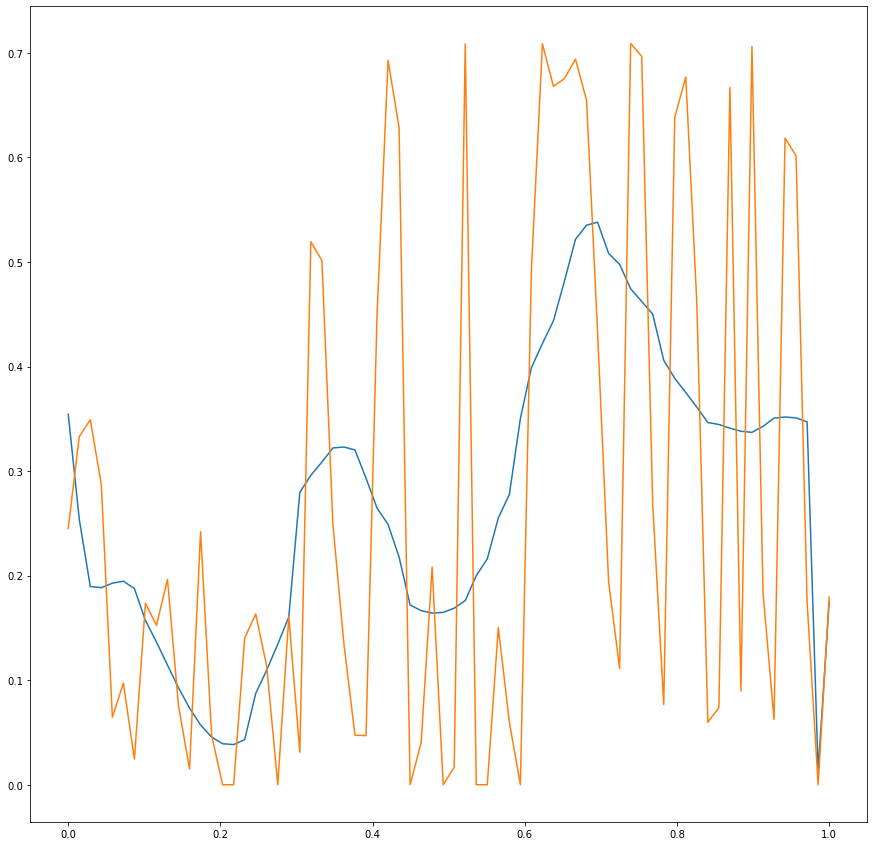

In [434]:
#params = [0.038302, 0.514875, -1.057085, 2.889895, -2.398473]

#par6 = ['6_poly_0', '6_poly_1', '6_poly_2', '6_poly_3', '6_poly_4', '6_poly_5', '6_poly_6']

n_loc=1
params = tr_test_df.iloc[n_loc][poly_coef[-2]]

#x = np.linspace(0,1,70)
def my_func(x):
    return np.array([params[i]*np.power(x,i) for i in range(len(params))]).sum(axis=0)
    
y=my_func(day_nbr_norm)
plt.plot(x, y)
plt.plot(x, np.array(tr_test_df.iloc[n_loc][date_col]))
#plt.plot(x, np.array(tr_test_df.iloc[0][spl_date_col]),color='b')

#tr_test_df[poly_coef_list]
#tr_test_df[par6]

In [72]:
crop_dict = dict()
crop_dict[0] = 'подсолнечник'
crop_dict[1] = 'картофель'
crop_dict[2] = 'пшеница озимая'
crop_dict[3] = 'гречиха'
crop_dict[4] = 'кукуруза'
crop_dict[5] = 'пшеница яровая'
crop_dict[6] = 'сахарная свекла'
crop_dict

{0: 'подсолнечник',
 1: 'картофель',
 2: 'пшеница озимая',
 3: 'гречиха',
 4: 'кукуруза',
 5: 'пшеница яровая',
 6: 'сахарная свекла'}

In [73]:
#poly_coef_list = [poly for poly in poly_coef]
#np.unique(tr_df['crop'],return_counts=True)
for crop in np.unique(tr_df['crop']):
    print(crop)
    print(crop, crop_dict[int(crop)])
    display(tr_df[tr_df['crop']==crop]['att'].describe())

0
0 подсолнечник


KeyError: 'att'

In [301]:
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(day_nbr)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, tmp_df)
pol_reg.coef_

array([ 0.        , -1.34123349,  7.10708605, -9.44939863,  3.77703992])

In [49]:
mod_name = 'subm2_sph_spl2_b0_e0_rep_try_10000_100_k'+str(k)+'_'+str(model.best_score_['learn']['MultiClass'])+'_'+str(model.best_score_['validation']['MultiClass'])+'_'+str(model.best_iteration_)
test_df['crop'].to_csv(mod_name+'.csv')


In [42]:
model.feature_importances_.argsort()[::-1]

array([12, 52, 31, 49, 43, 30, 72, 67, 71, 40, 74, 57, 73, 45, 51, 60, 76,
       69, 41, 79, 78, 24, 65, 58, 27, 32, 21, 36, 53, 68, 39, 28, 11, 59,
       15, 33, 61, 77, 13, 44, 20, 23, 66, 14, 19, 42, 35, 37, 38, 34, 18,
       16, 22, 62, 29, 75, 80,  0, 47, 70, 46, 48, 50, 17, 26, 25, 54, 64,
       56, 63, 55,  6,  1,  5,  2, 10,  9,  4,  7,  3,  8], dtype=int64)

In [46]:
str(model.best_score_['learn']['MultiClass'])+'_'+str(model.best_score_['validation']['MultiClass'])+'_'+str(model.best_iteration_)

'0.00803293807517780.19611748676330112'

3099

In [38]:
dir(model)

['__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_base_calc_leaf_indexes',
 '_base_drop_unused_features',
 '_base_eval_metrics',
 '_base_predict',
 '_base_shrink',
 '_base_virtual_ensembles_predict',
 '_calc_fstr',
 '_calc_leaf_indexes',
 '_calc_ostr',
 '_check_is_compatible_loss',
 '_convert_to_asymmetric_representation',
 '_deserialize_model',
 '_estimator_type',
 '_eval_metrics',
 '_fit',
 '_get_borders',
 '_get_cat_feature_indices',
 '_get_embedding_feature_indices',
 '_get_float_feature_indices',
 '_get_nan_treatments',
 '_get_params',
 '_get_tags',
 '_get_text_feature_indices',
 '_get_tree_leaf_value

In [167]:
tr_df[mod_no_date_col]

,area,lt,att,att_sin,lt_sin,att_cos,lt_cos,att_tan,lt_tan,att_ctn,lt_ctn
id,,,,,,,,,,,
3536,20,0.912898,0.960851,0.819680,0.791279,0.572822,0.611455,1.430949,1.294093,0.698837,0.772742
3739,45,0.971661,0.942617,0.809099,0.825824,0.587673,0.563928,1.376785,1.464412,0.726330,0.682868
1294,28,0.714518,0.895924,0.780787,0.655254,0.624798,0.755409,1.249663,0.867416,0.800216,1.152850
2859,19,0.720458,0.876672,0.768614,0.659729,0.639712,0.751504,1.201500,0.877878,0.832293,1.139110
3685,33,0.917932,0.949082,0.812881,0.794347,0.582430,0.607464,1.395672,1.307645,0.716501,0.764734
...,...,...,...,...,...,...,...,...,...,...,...
3772,74,0.683458,0.906041,0.787068,0.631478,0.616867,0.775394,1.275912,0.814396,0.783753,1.227903
5191,109,0.665804,0.910329,0.789705,0.617691,0.613486,0.786421,1.287243,0.785447,0.776854,1.273161
5226,58,0.573752,0.926959,0.799798,0.542787,0.600269,0.839870,1.332401,0.646275,0.750525,1.547329


## Выделим выборки

In [530]:
X = df.drop(["id",".geo", "crop"], axis = 1)
y = df[["crop"]]

In [531]:
X.head()

,area,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-22,nd_mean_2021-04-26,nd_mean_2021-04-28,nd_mean_2021-04-30,nd_mean_2021-05-01,nd_mean_2021-05-02,...,nd_mean_2021-06-10,nd_mean_2021-07-05,nd_mean_2021-08-13,nd_mean_2021-08-27,nd_mean_2021-05-03,nd_mean_2021-06-02,nd_mean_2021-07-04,nd_mean_2021-08-10,nd_mean_2021-08-23,nd_mean_2021-05-24
0,40,0.159413,0.251090,0.288860,0.039673,0.301931,0.000000,0.274627,0.079860,0.142140,...,0.651197,0.760103,0.413159,0.000000,0.169458,0.568205,0.362157,0.380075,0.360077,0.552304
1,75,0.231795,0.260749,0.304190,0.483102,0.213664,0.190464,0.342645,0.000000,0.396637,...,0.353390,0.119815,0.339988,0.145459,0.000000,0.013604,0.258762,0.271984,0.000000,0.302597
2,75,0.000000,0.176574,0.000000,0.291817,0.352851,0.024589,0.000000,0.345859,0.145083,...,0.031849,0.305729,0.000000,0.023593,0.149080,0.000000,0.158617,0.419407,0.046266,0.215719
3,55,0.000000,0.317001,0.267246,0.000000,0.265689,0.038065,0.000000,0.533367,0.276083,...,0.009670,0.129912,0.588483,0.020564,0.073617,0.804204,0.820184,0.018503,0.807123,0.202017
4,25,0.083827,0.000000,0.167003,0.308370,0.150439,0.179282,0.192157,0.328494,0.132613,...,0.072474,0.015783,0.143457,0.215363,0.101592,0.068873,0.190155,0.068211,0.379317,0.275945


## Обучение модели

In [532]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [539]:
clf = RandomForestClassifier(random_state=0, n_estimators = 3)

In [540]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(n_estimators=3, random_state=0)

## Оценка точности

In [541]:
from sklearn.metrics import recall_score, precision_score

pred = clf.predict(X_test)
print(clf,'\n',recall_score(y_test, pred, average="macro", zero_division=0))

RandomForestClassifier(n_estimators=3, random_state=0) 
 0.6559326854718475


In [304]:
df_hr = pd.DataFrame({
    'time': [datetime.datetime(2022,1,1,7,40),
             datetime.datetime(2022,1,1,9,50),
             datetime.datetime(2022,1,1,10,1)], 'hr': [60, 90,100]})
df_bp = pd.DataFrame({'time': [datetime.datetime(2022,1,1,10), datetime.datetime(2022,1,1,8)], 'bp': [140, 120]})
'''
Ожидаемый результат:
pandas.DataFrame({
'time_hr': [datetime(2022,1,1,9,50)],
'hr': [90],
'time_bp': [datetime(2022,1,1,10)],
'bp': [140]
})
'''
def nearest_hr(x):
    #print('x',x,type(x))
    tmp_df = df_hr[x-df_hr['time']>=datetime.timedelta(minutes=15)]
    #display(tmp_df)
    res = tmp_df[tmp_df['time']==tmp_df['time'].max()].values[0]#.tolist()
    #print('res', type(res),  res)
    return res

df_bp_hr = df_bp.copy(deep=True).rename(columns={'time': 'time_bp'})

df_bp_hr['tmp_col'] = df_bp_hr['time_bp'].apply(lambda x: nearest_hr(x))
df_bp_hr['time_hr'] = [val[0] for val in df_bp_hr['tmp_col'].values]
df_bp_hr['hr'] = [val[1] for val in df_bp_hr['tmp_col'].values]
df_bp_hr.drop(columns='tmp_col',inplace=True)

df_bp_hr = df_bp_hr[['time_hr', 'hr', 'time_bp', 'bp']]
df_bp_hr


,time_hr,hr,time_bp,bp
0,2022-01-01 07:40:00,60,2022-01-01 10:00:00,140
1,2022-01-01 07:40:00,60,2022-01-01 08:00:00,120
